# Divvy Modeling Erratic

In [1]:
errk <- read.csv('/content/df_station_1721_FINAL_Erratic_Clusterd.csv')

In [2]:
errk_select <- errk[((errk$Nbh_Hourly_IN_forecastability=='Erratic') & (errk$Nbh_Hourly_OUT_forecastability=='Erratic') & (errk$Erratic_Kmeans2==1)),]

In [3]:
errk_select[!duplicated(errk_select['Nbh_id']),][,c('Nbh_id','Nbh_Hourly_IN_CV2','Nbh_Hourly_OUT_CV2')]

Nbh_id Nbh_Hourly_IN_CV2 Nbh_Hourly_OUT_CV2
4   28.2   2.167557          2.197712          
152  8.6   1.583374          1.831829          
154 21.1   2.811440          3.048236          
162 74.1   1.970639          2.236288          
183 28.1   1.841900          1.980969

In [4]:
Nbh_Hour_IN_1721_full <- read.csv('/content/Nbh_Hour_IN_1721_full.csv')
Nbh_Hour_OUT_1721_full <- read.csv('/content/Nbh_Hour_OUT_1721_full.csv')

In [5]:
library(stringr)
nbh_hr_in_1719 <- Nbh_Hour_IN_1721_full[str_detect(Nbh_Hour_IN_1721_full$Hour,"2017")|str_detect(Nbh_Hour_IN_1721_full$Hour,"2018")|str_detect(Nbh_Hour_IN_1721_full$Hour,"2019"),]
nbh86_hr_in_1719 <- data.frame(nbh_hr_in_1719[,c('Hour','X8.6')])

In [6]:
nbh_hr_out_1719 <- Nbh_Hour_OUT_1721_full[str_detect(Nbh_Hour_OUT_1721_full$Hour,"2017")|str_detect(Nbh_Hour_OUT_1721_full$Hour,"2018")|str_detect(Nbh_Hour_OUT_1721_full$Hour,"2019"),]
nbh86_hr_out_1719 <- data.frame(nbh_hr_out_1719[,c('Hour','X8.6')])

In [7]:
nbh86_hr_in_1719$Hour <- strptime(nbh86_hr_in_1719$Hour, format = '%Y-%m-%d %H:%M:%S')
nbh86_hr_out_1719$Hour <- strptime(nbh86_hr_out_1719$Hour, format = '%Y-%m-%d %H:%M:%S')

**PLOT**

Bike-IN and Bike-OUT
* Pattern, Seasonality
* Yearly, Monthly, Weekly, Daily
* Periodogram

In [8]:
install.packages("xts")
library(xts)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




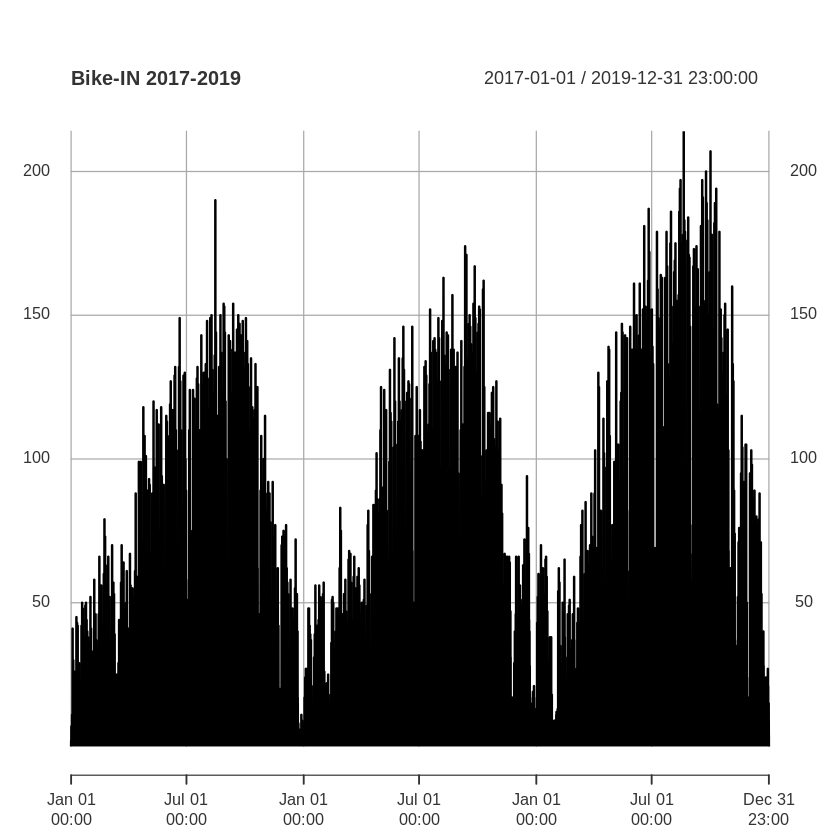

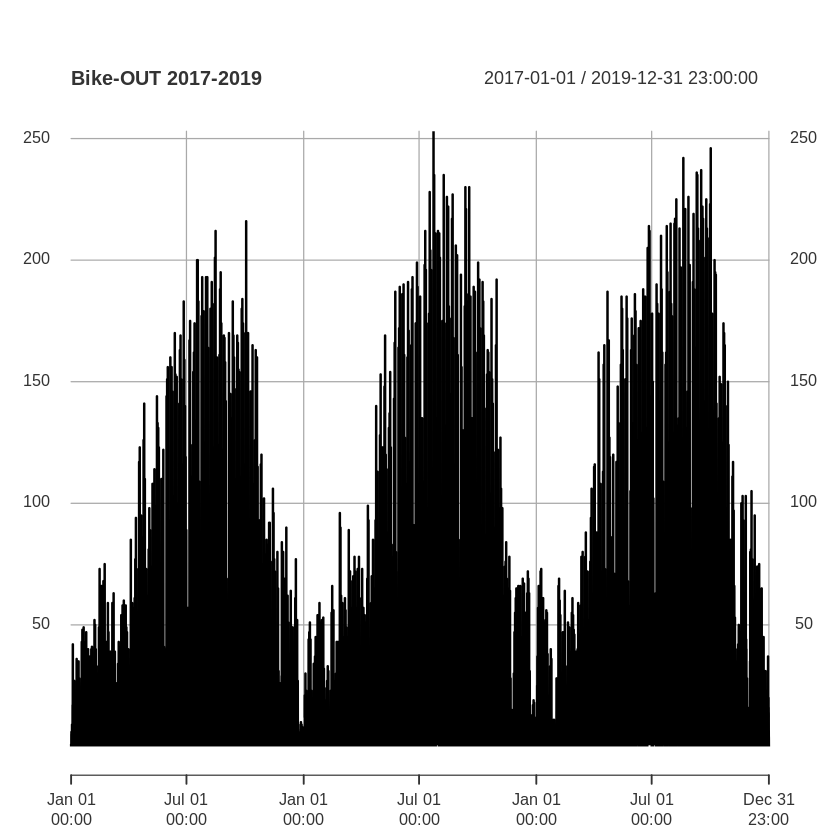

In [9]:
nbh86_hr_in_1719_xts <- as.xts(nbh86_hr_in_1719$`X8.6`, order.by = nbh86_hr_in_1719$Hour)
nbh86_hr_out_1719_xts <- as.xts(nbh86_hr_out_1719$`X8.6`, order.by = nbh86_hr_out_1719$Hour)

plot(nbh86_hr_in_1719_xts, main='Bike-IN 2017-2019')
plot(nbh86_hr_out_1719_xts, main='Bike-OUT 2017-2019')

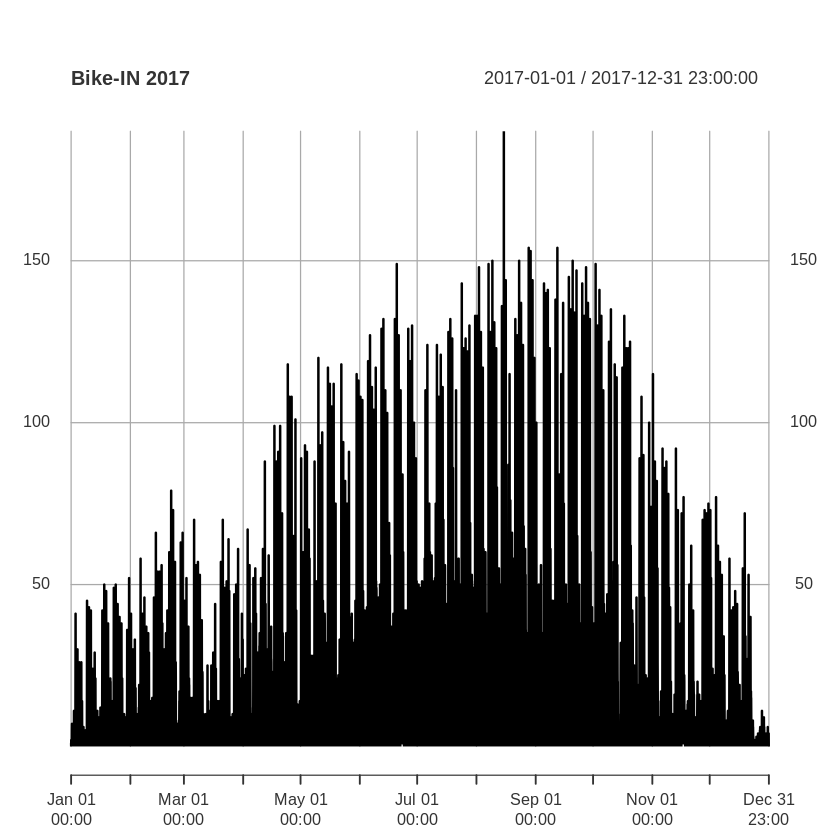

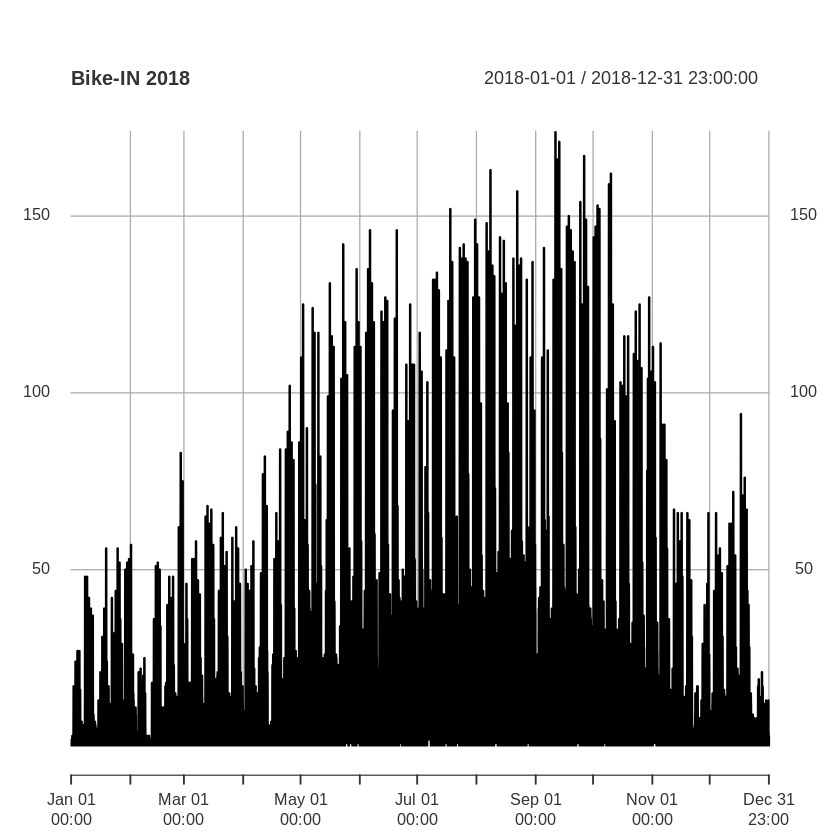

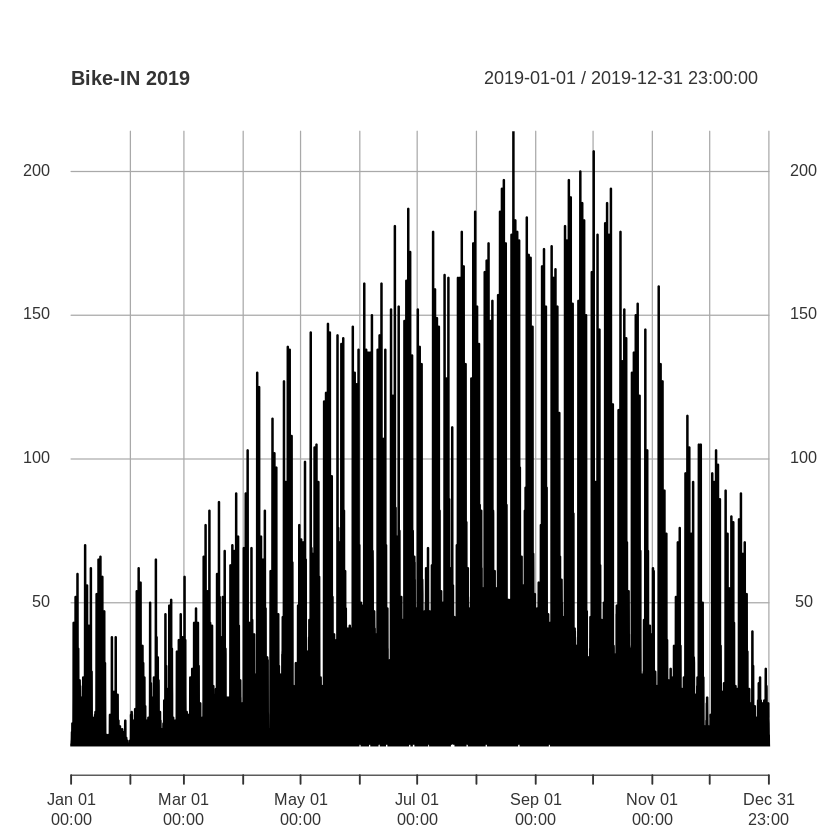

In [10]:
plot(nbh86_hr_in_1719_xts['/2017-12'], main='Bike-IN 2017')
plot(nbh86_hr_in_1719_xts['2018-01/2018-12'], main='Bike-IN 2018')
plot(nbh86_hr_in_1719_xts['2019-01/'], main='Bike-IN 2019')

[1] "Monthly decomposition for 2017"


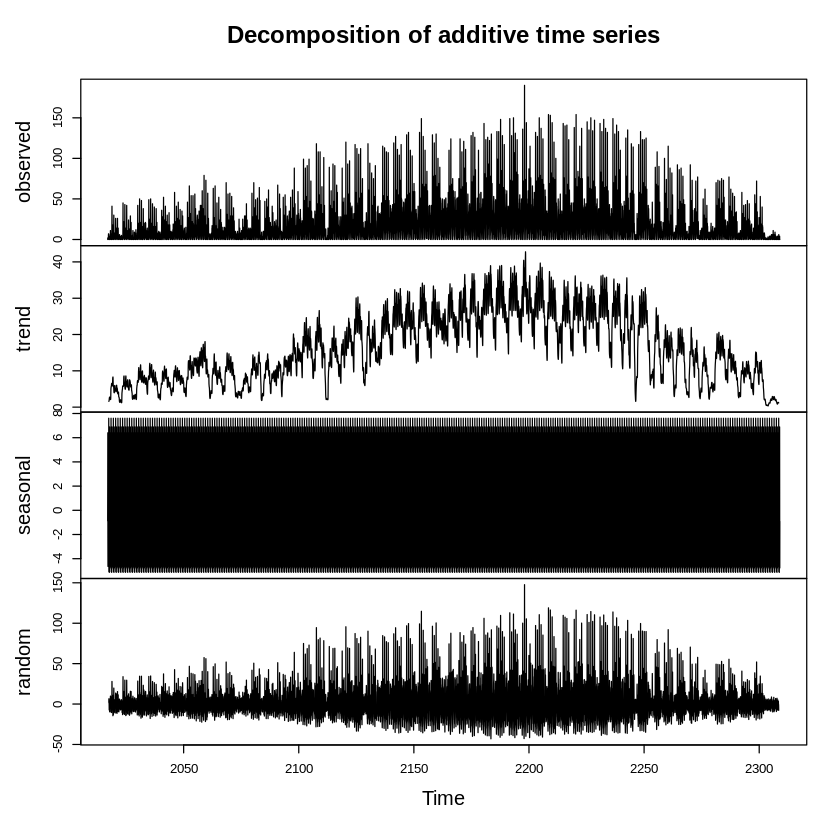

In [11]:
print("Monthly decomposition for 2017")
plot(decompose(ts(nbh86_hr_in_1719_xts['/2017-12'],frequency = 30,start = c(2017,1))))

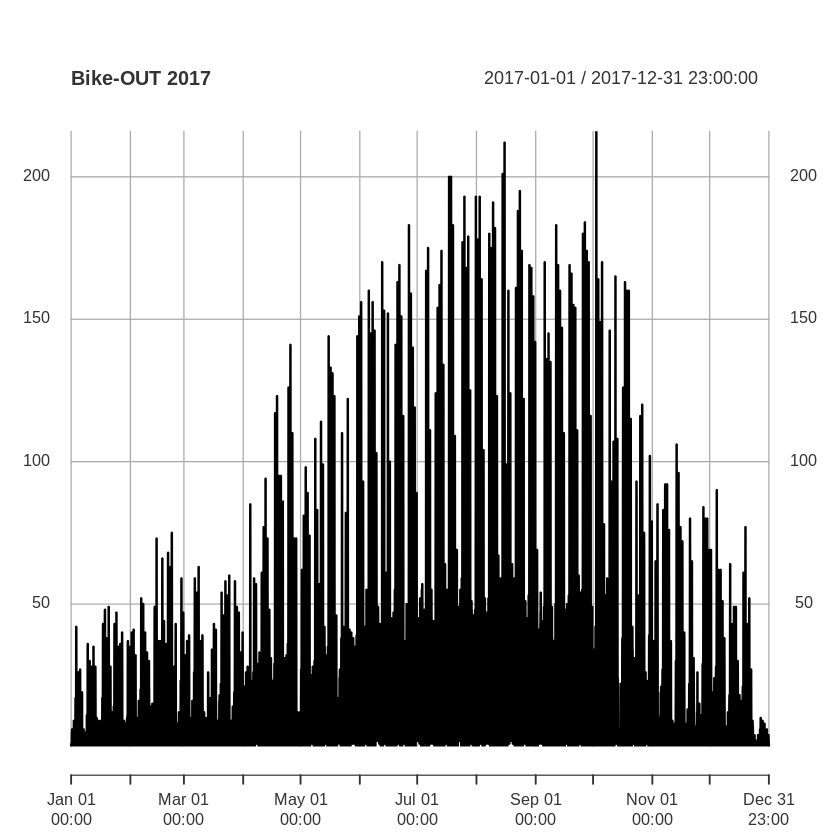

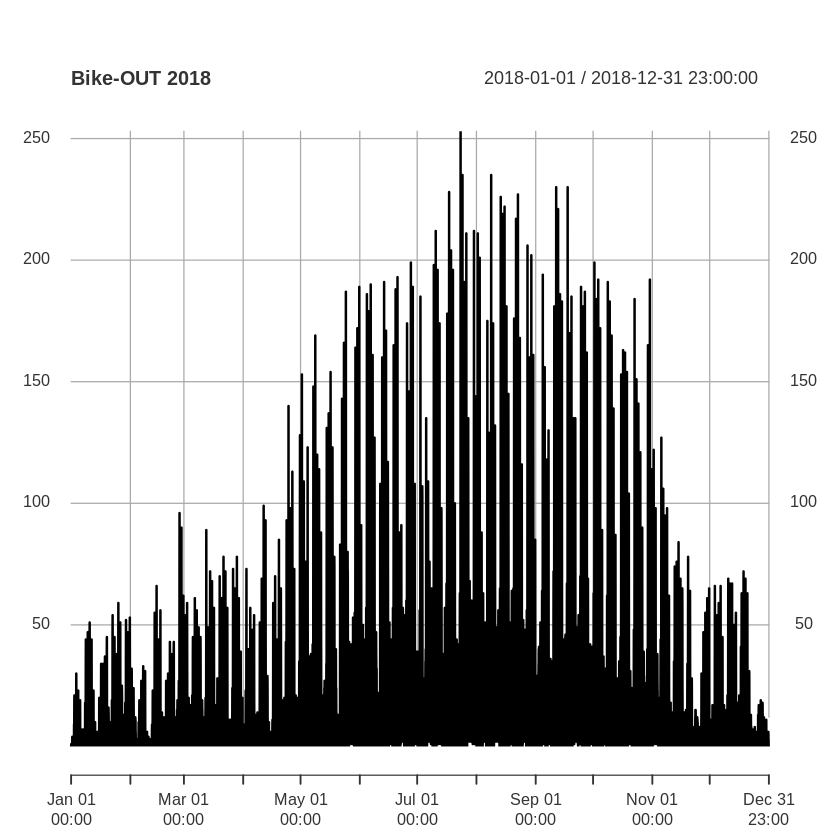

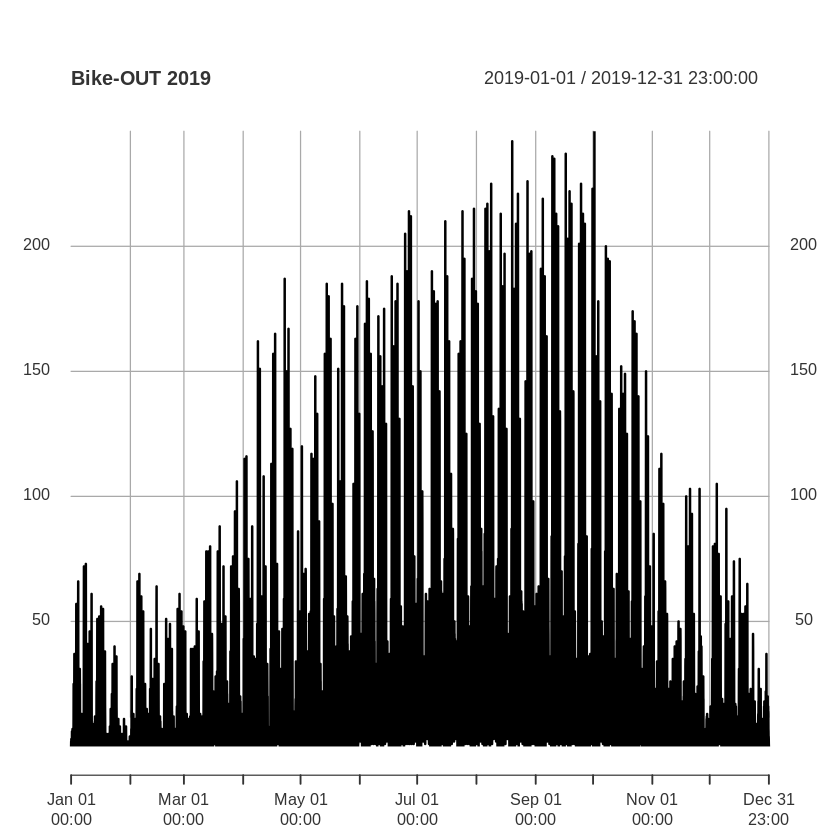

In [12]:
plot(nbh86_hr_out_1719_xts['/2017-12'], main='Bike-OUT 2017')
plot(nbh86_hr_out_1719_xts['2018-01/2018-12'], main='Bike-OUT 2018')
plot(nbh86_hr_out_1719_xts['2019-01/'], main='Bike-OUT 2019')

[1] "Monthly decomposition for 2017"


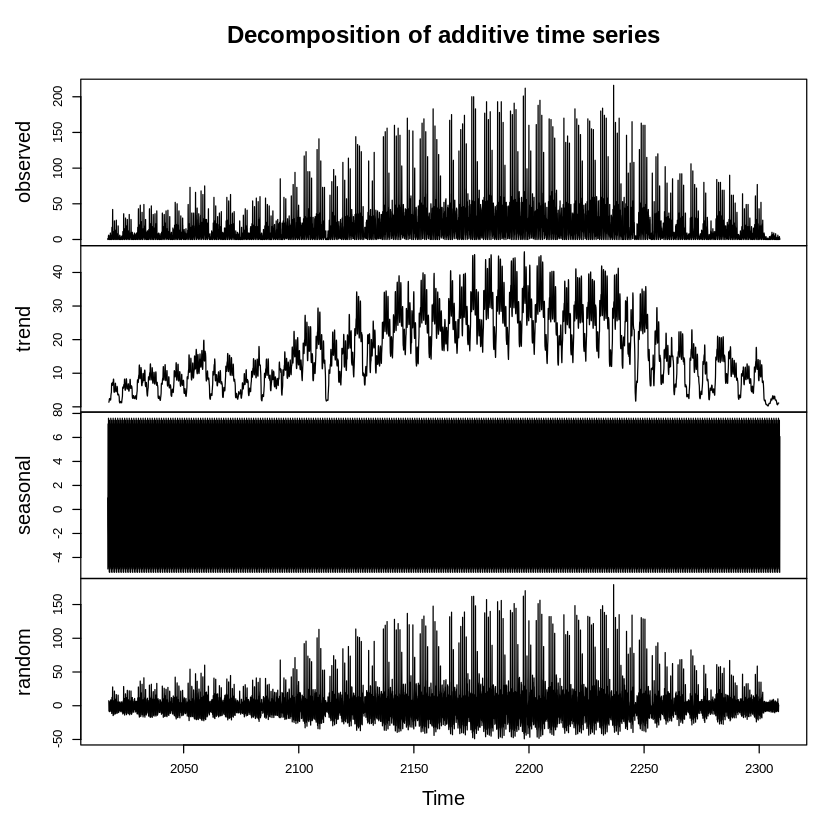

In [13]:
print("Monthly decomposition for 2017")
plot(decompose(ts(nbh86_hr_out_1719_xts['/2017-12'],frequency = 30,start = c(2017,1))))

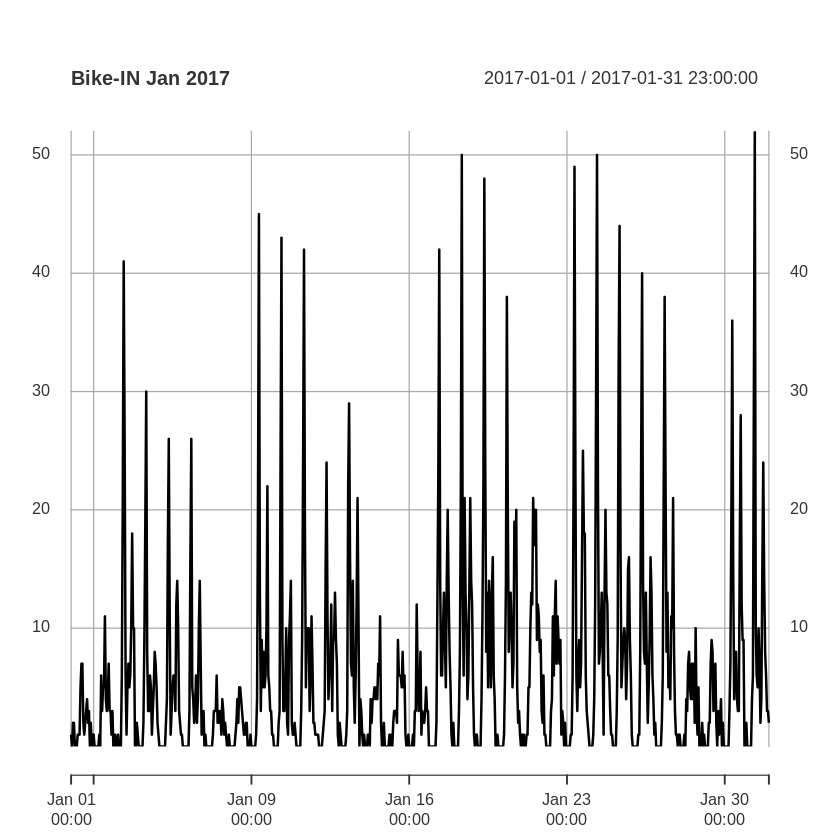

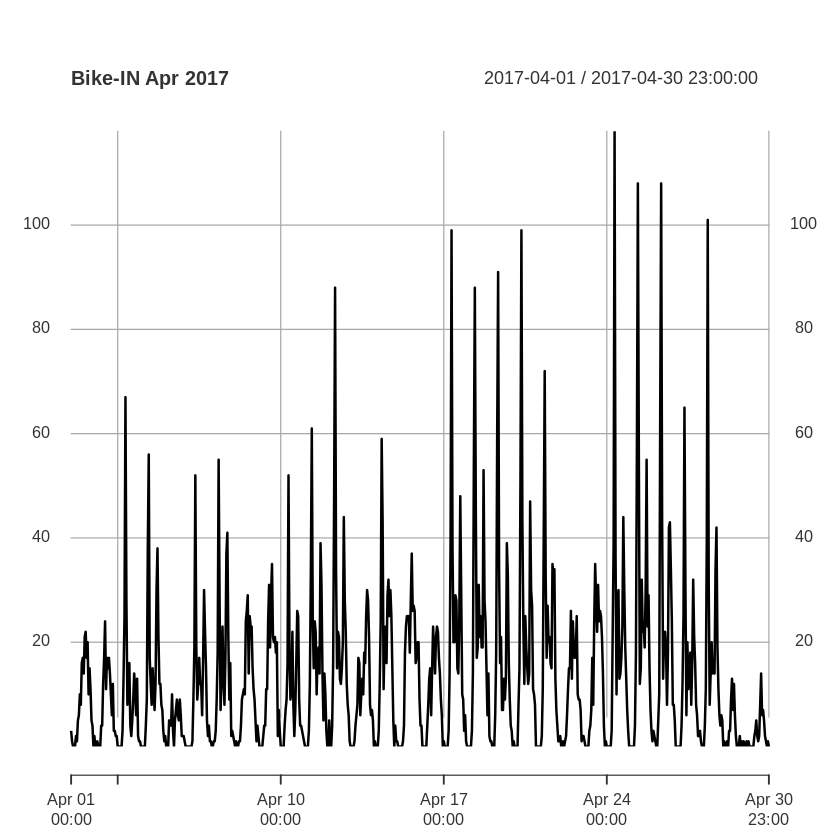

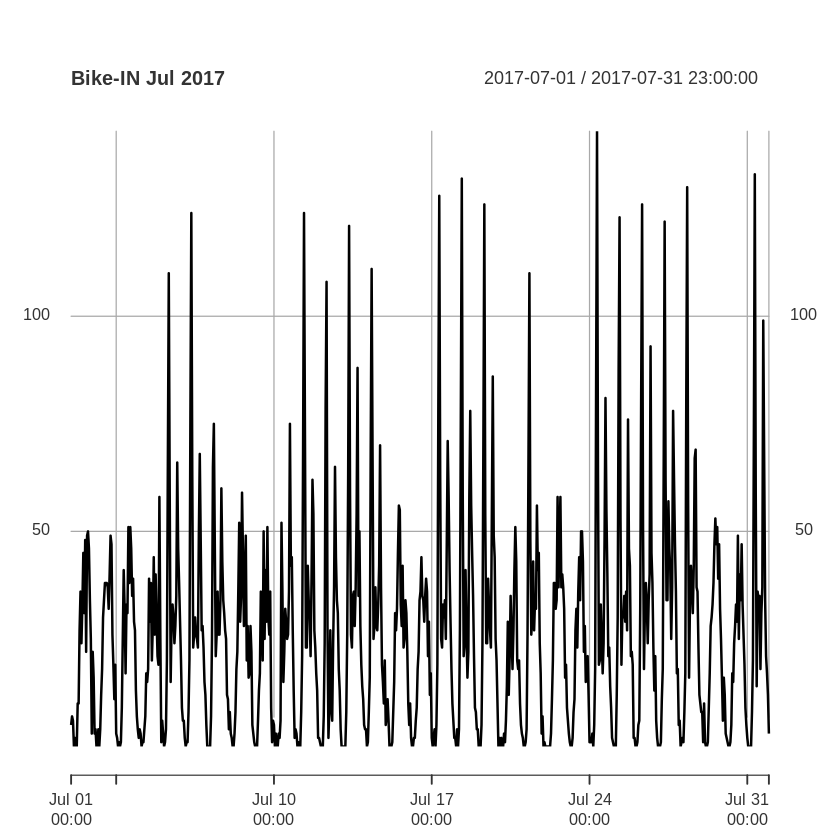

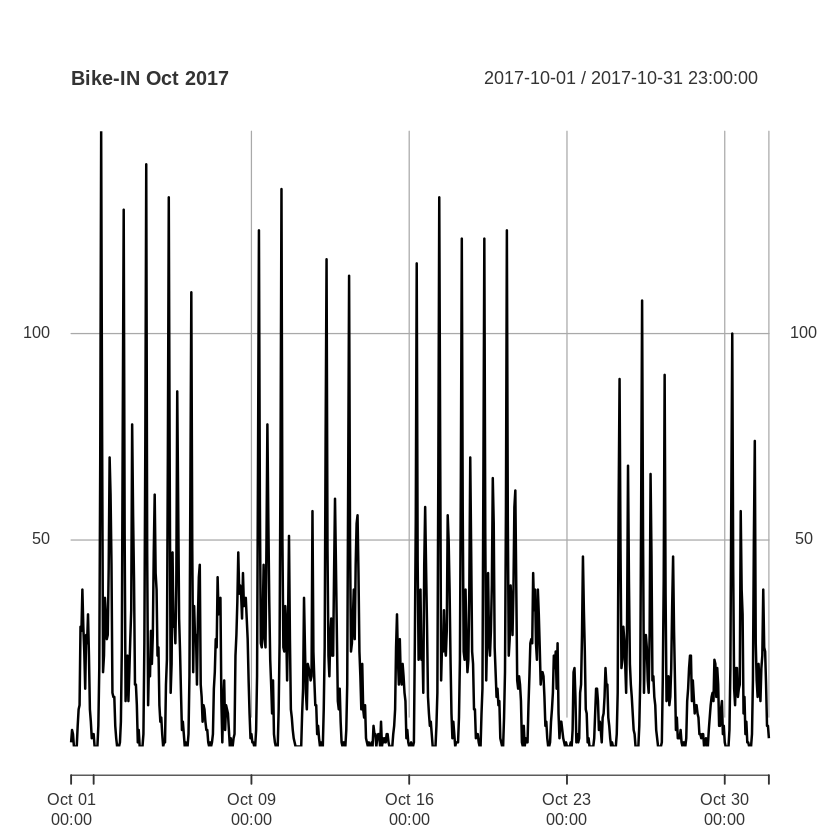

In [14]:
plot(nbh86_hr_in_1719_xts['/2017-01-31'], main='Bike-IN Jan 2017')
plot(nbh86_hr_in_1719_xts['2017-04-01/2017-04-30'], main='Bike-IN Apr 2017')
plot(nbh86_hr_in_1719_xts['2017-07-01/2017-07-31'], main='Bike-IN Jul 2017')
plot(nbh86_hr_in_1719_xts['2017-10-01/2017-10-31'], main='Bike-IN Oct 2017')

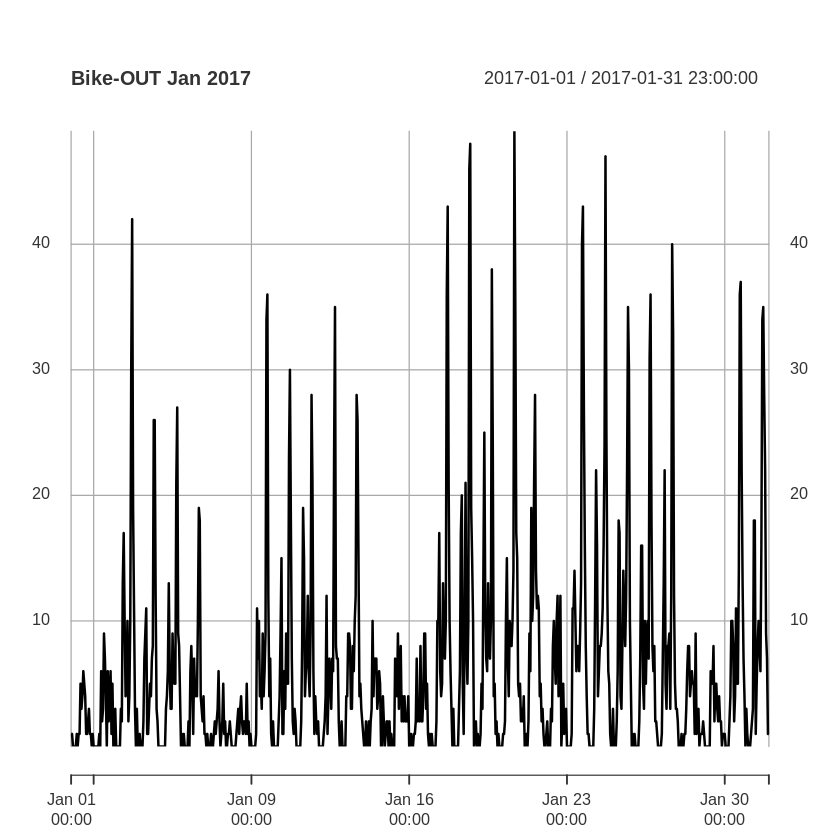

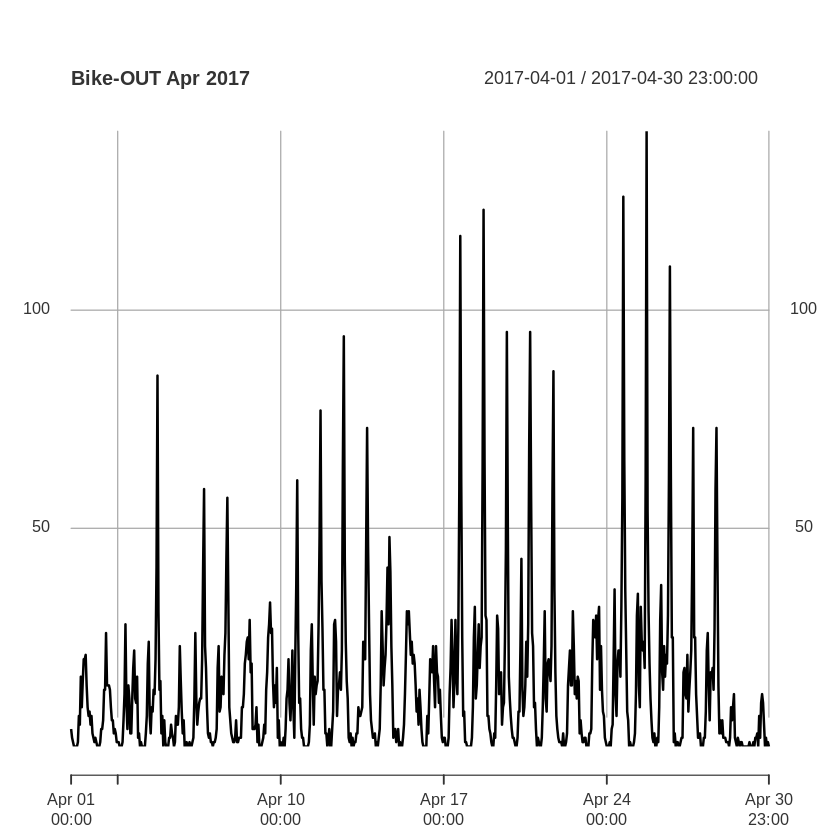

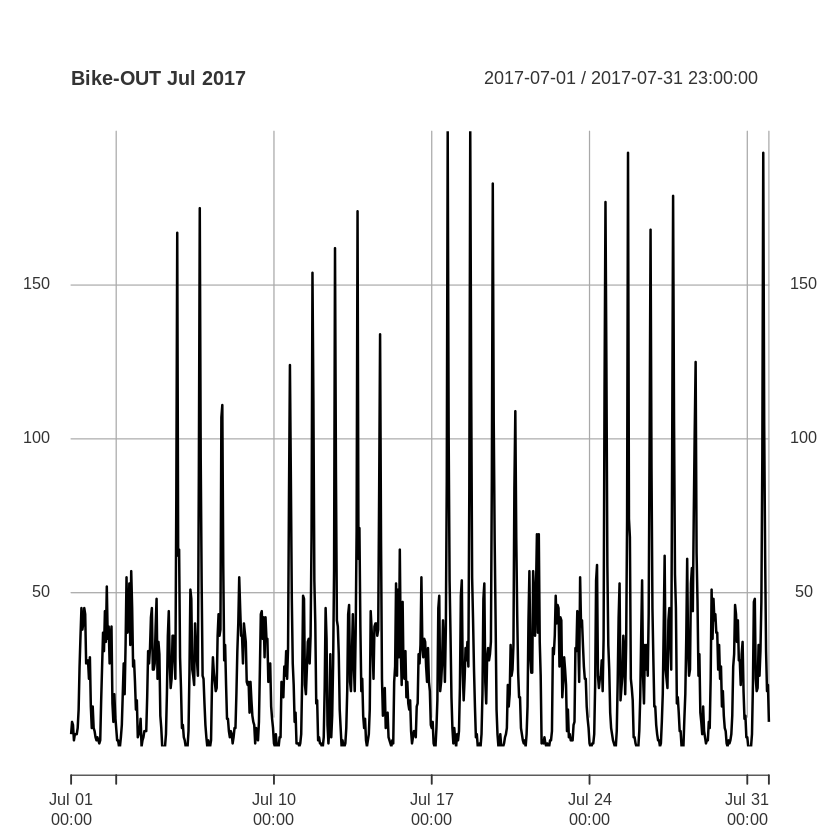

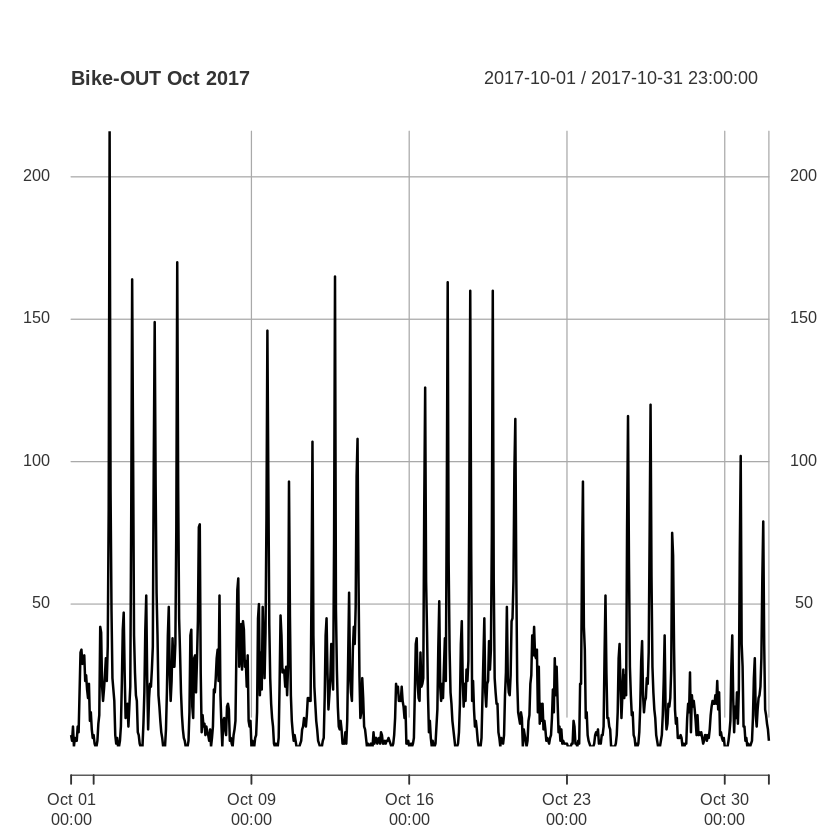

In [15]:
plot(nbh86_hr_out_1719_xts['/2017-01-31'], main='Bike-OUT Jan 2017')
plot(nbh86_hr_out_1719_xts['2017-04-01/2017-04-30'], main='Bike-OUT Apr 2017')
plot(nbh86_hr_out_1719_xts['2017-07-01/2017-07-31'], main='Bike-OUT Jul 2017')
plot(nbh86_hr_out_1719_xts['2017-10-01/2017-10-31'], main='Bike-OUT Oct 2017')

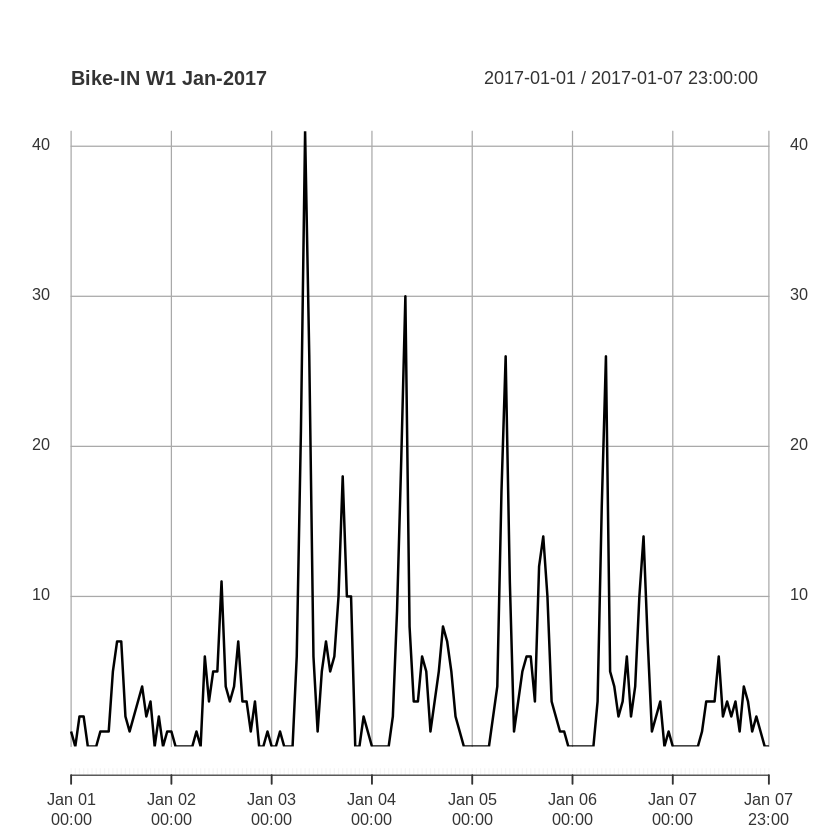

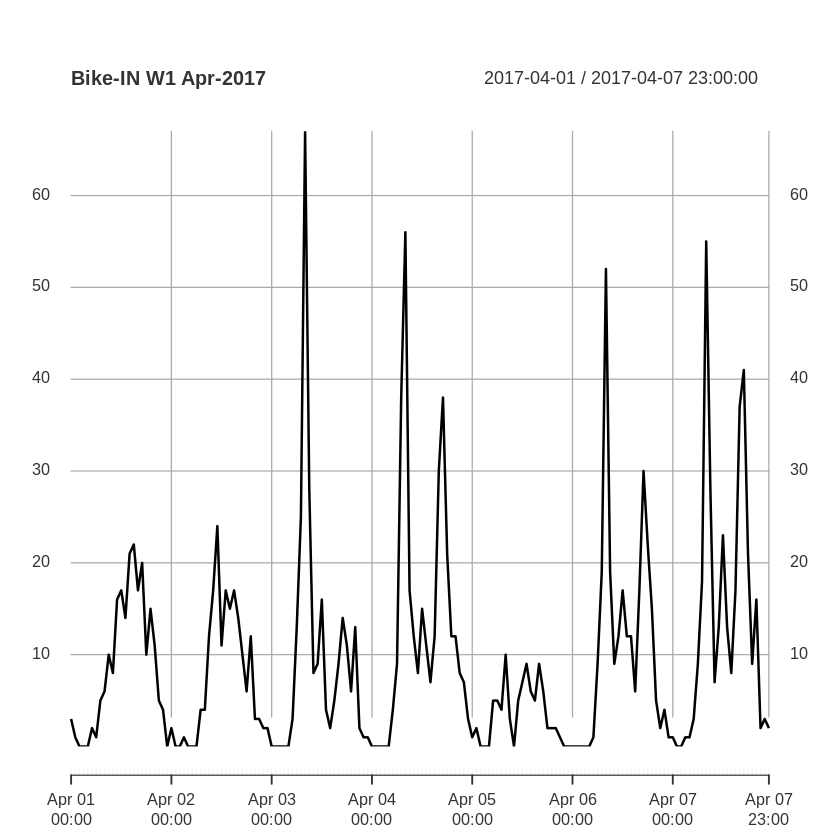

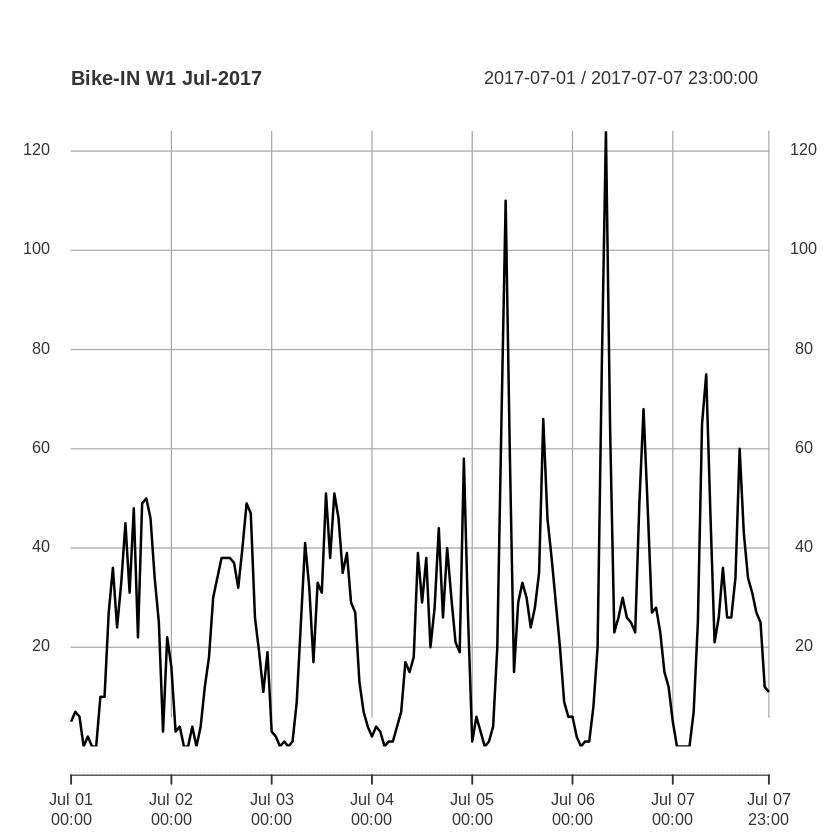

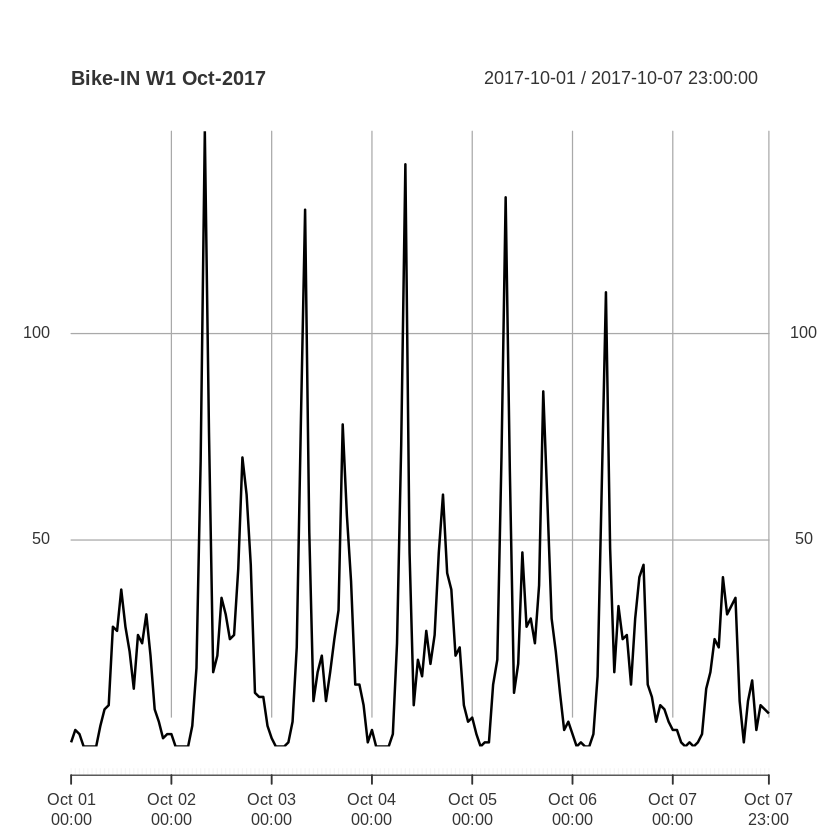

In [16]:
plot(nbh86_hr_in_1719_xts['/2017-01-07'], main = 'Bike-IN W1 Jan-2017')
plot(nbh86_hr_in_1719_xts['2017-04-01/2017-04-07'], main = 'Bike-IN W1 Apr-2017')
plot(nbh86_hr_in_1719_xts['2017-07-01/2017-07-07'], main = 'Bike-IN W1 Jul-2017')
plot(nbh86_hr_in_1719_xts['2017-10-01/2017-10-07'], main = 'Bike-IN W1 Oct-2017')

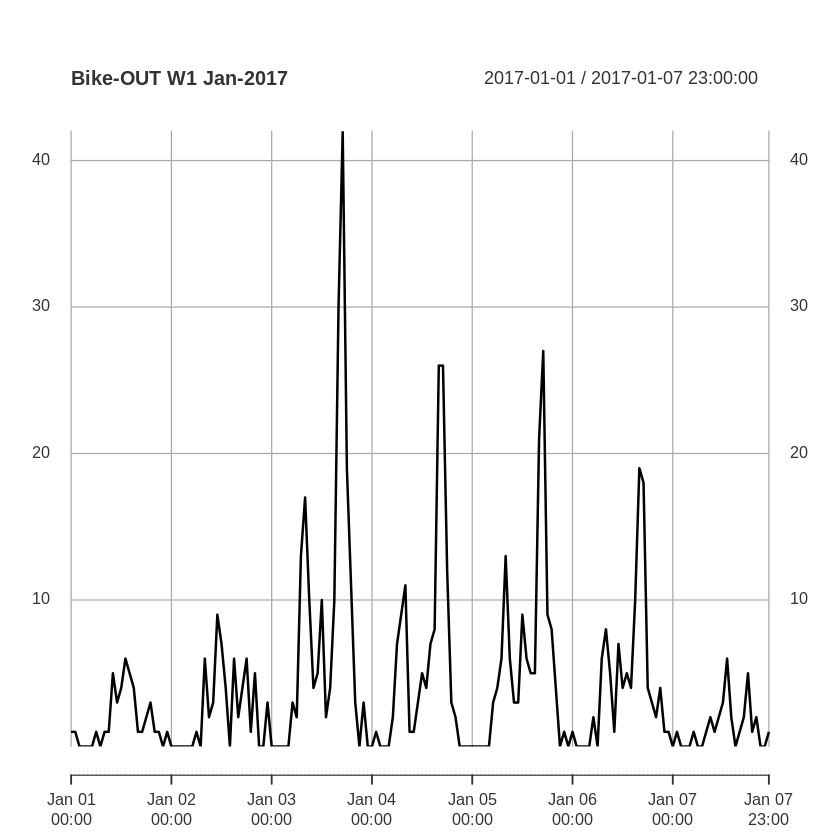

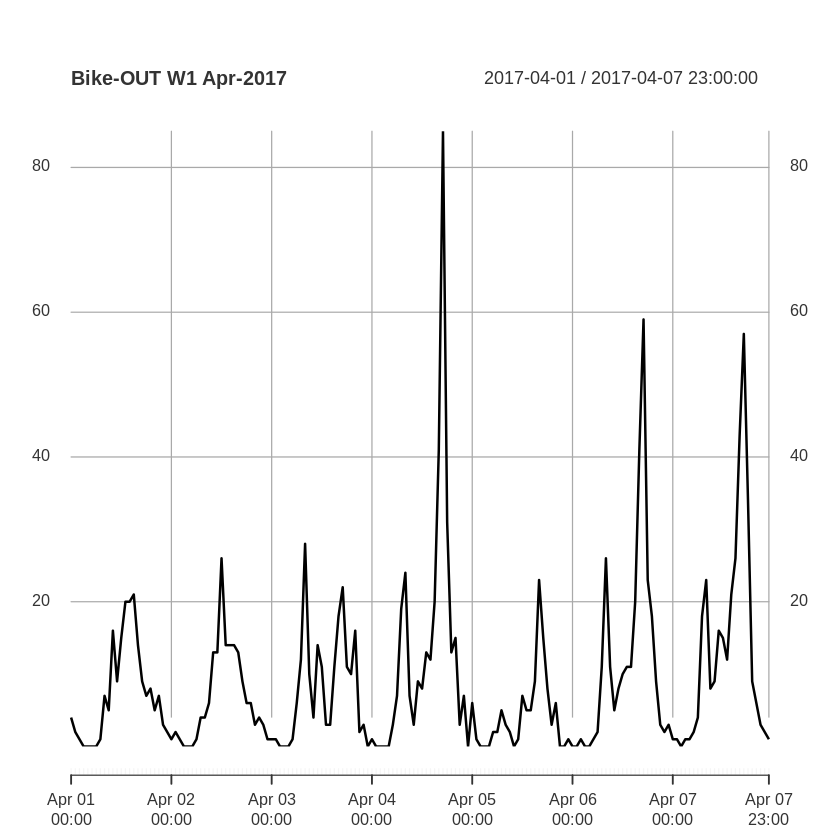

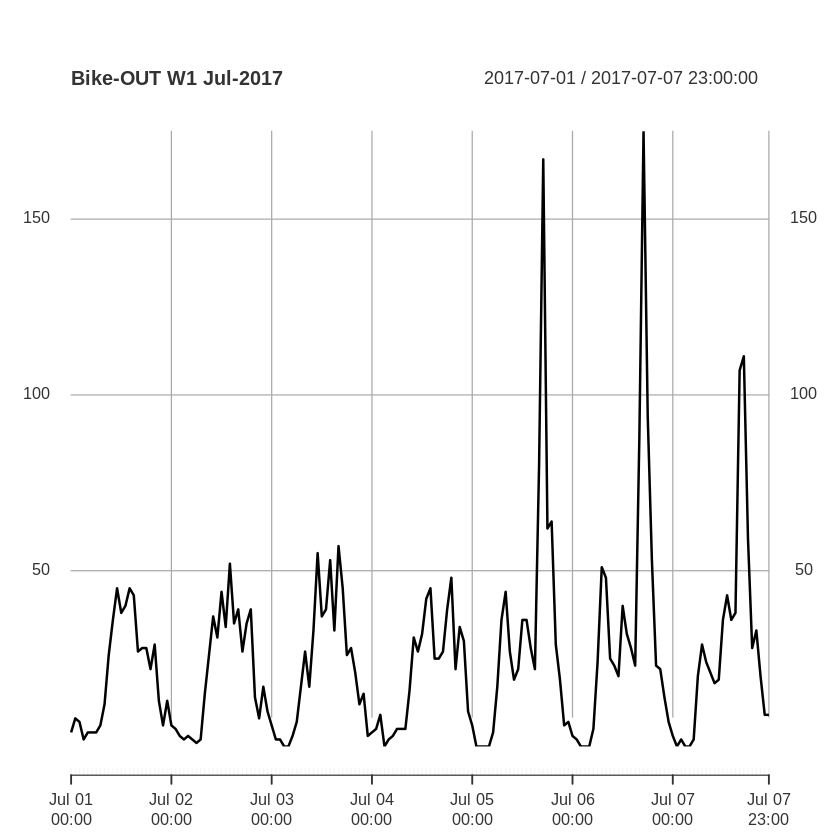

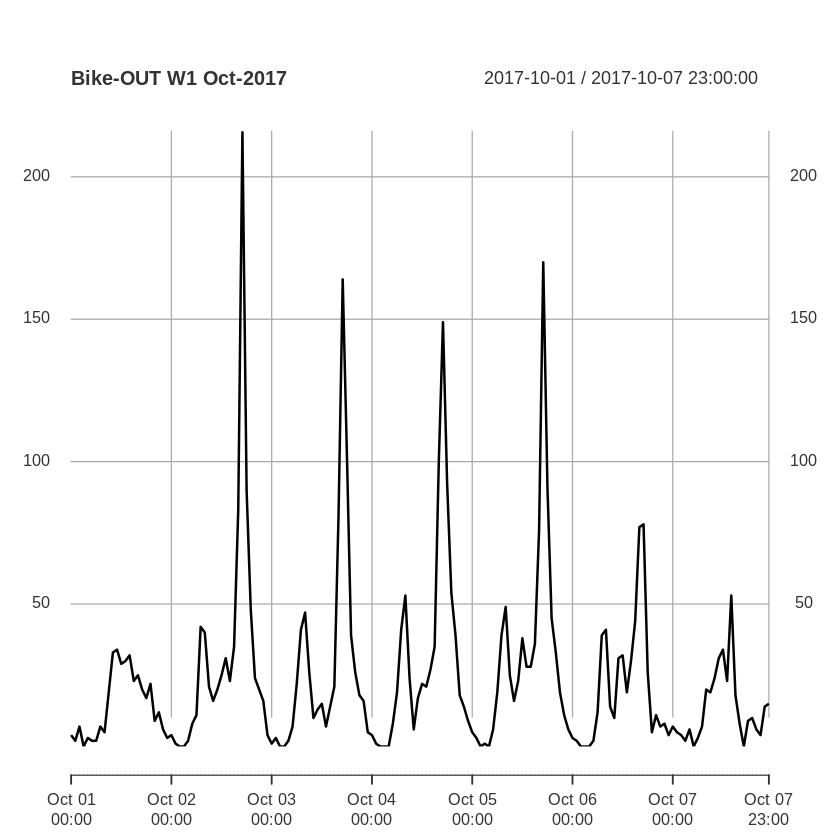

In [17]:
plot(nbh86_hr_out_1719_xts['/2017-01-07'], main = 'Bike-OUT W1 Jan-2017')
plot(nbh86_hr_out_1719_xts['2017-04-01/2017-04-07'], main = 'Bike-OUT W1 Apr-2017')
plot(nbh86_hr_out_1719_xts['2017-07-01/2017-07-07'], main = 'Bike-OUT W1 Jul-2017')
plot(nbh86_hr_out_1719_xts['2017-10-01/2017-10-07'], main = 'Bike-OUT W1 Oct-2017')

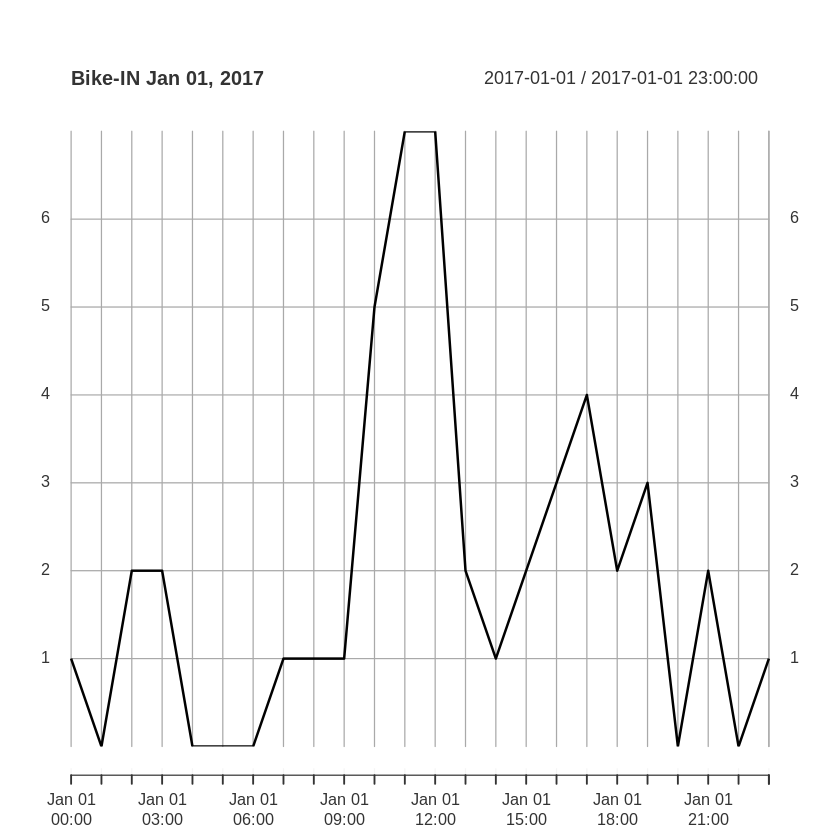

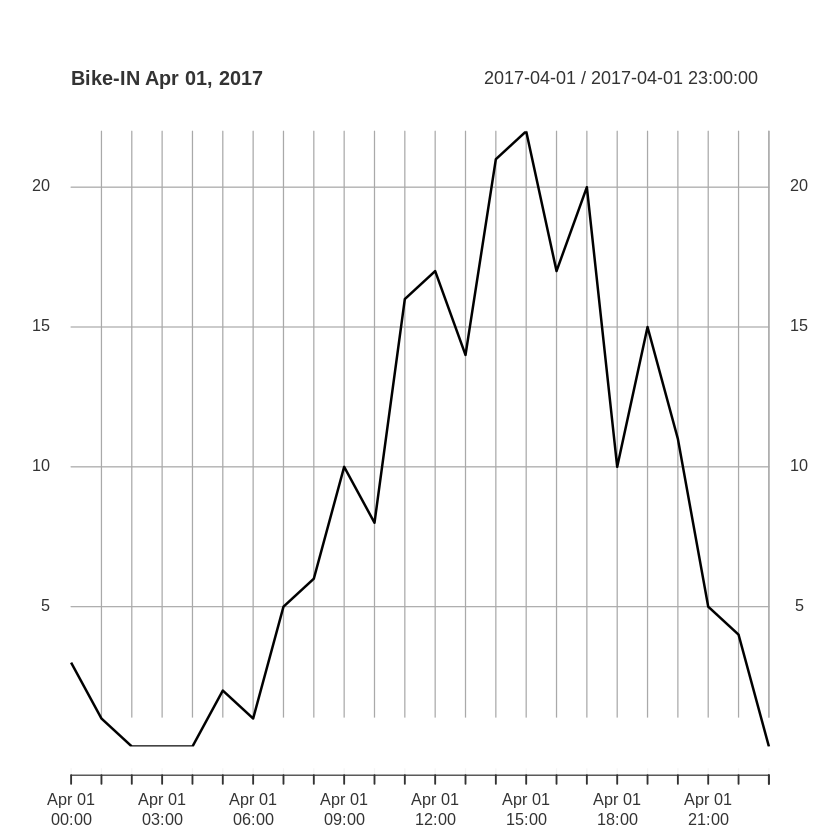

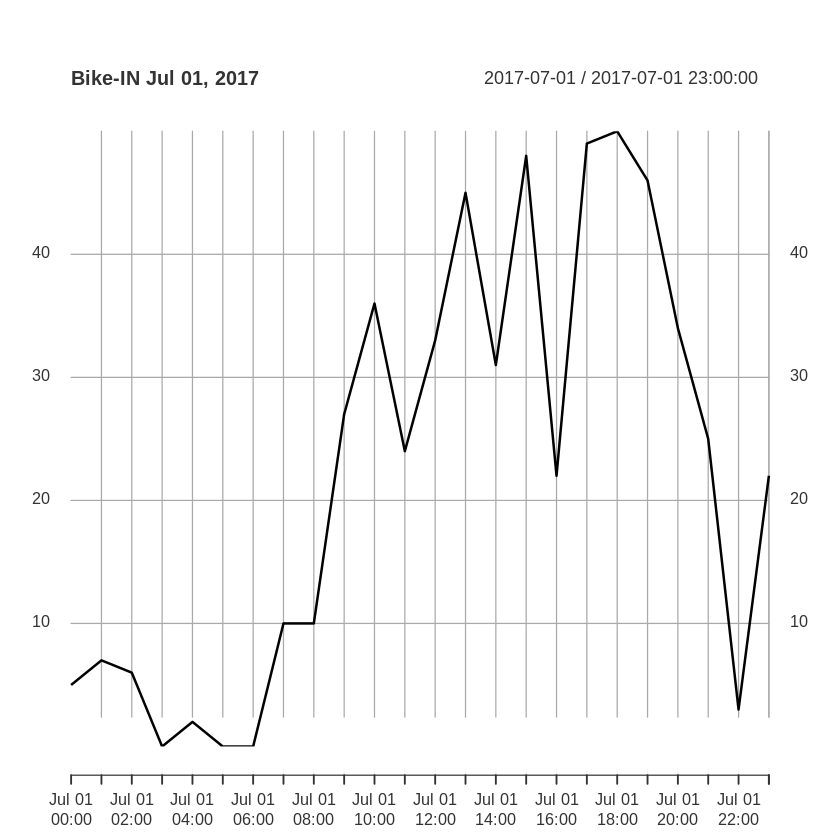

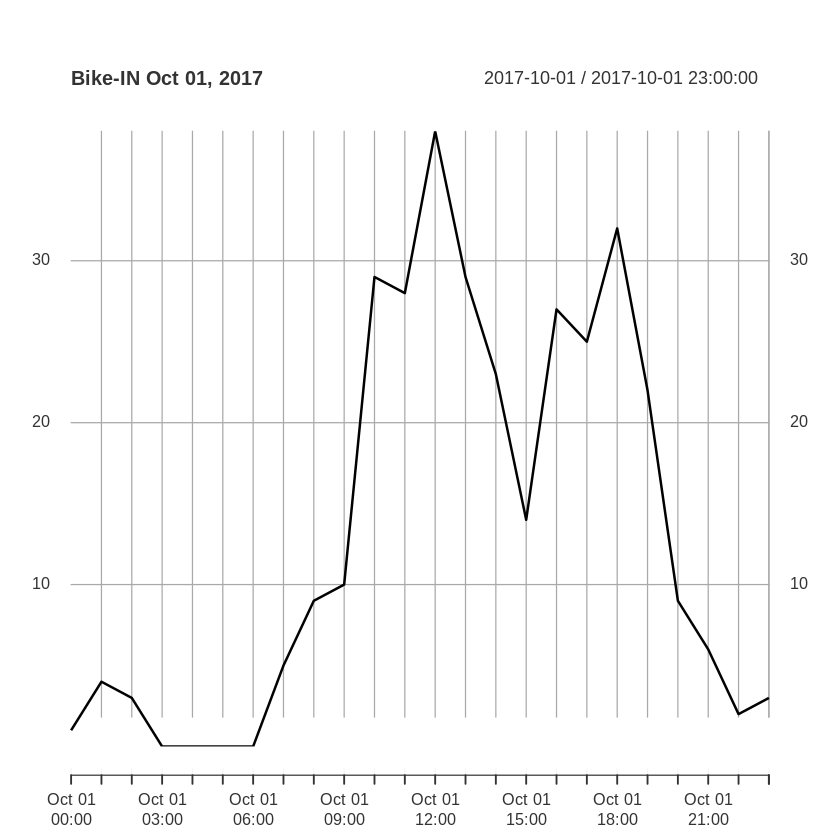

In [18]:
plot(nbh86_hr_in_1719_xts['/2017-01-01 23:00:00'],main = 'Bike-IN Jan 01, 2017')
plot(nbh86_hr_in_1719_xts['2017-04-01 00:00:00/2017-04-01 23:00:00'], main = 'Bike-IN Apr 01, 2017')
plot(nbh86_hr_in_1719_xts['2017-07-01 00:00:00/2017-07-01 23:00:00'], main = 'Bike-IN Jul 01, 2017')
plot(nbh86_hr_in_1719_xts['2017-10-01 00:00:00/2017-10-01 23:00:00'], main = 'Bike-IN Oct 01, 2017')

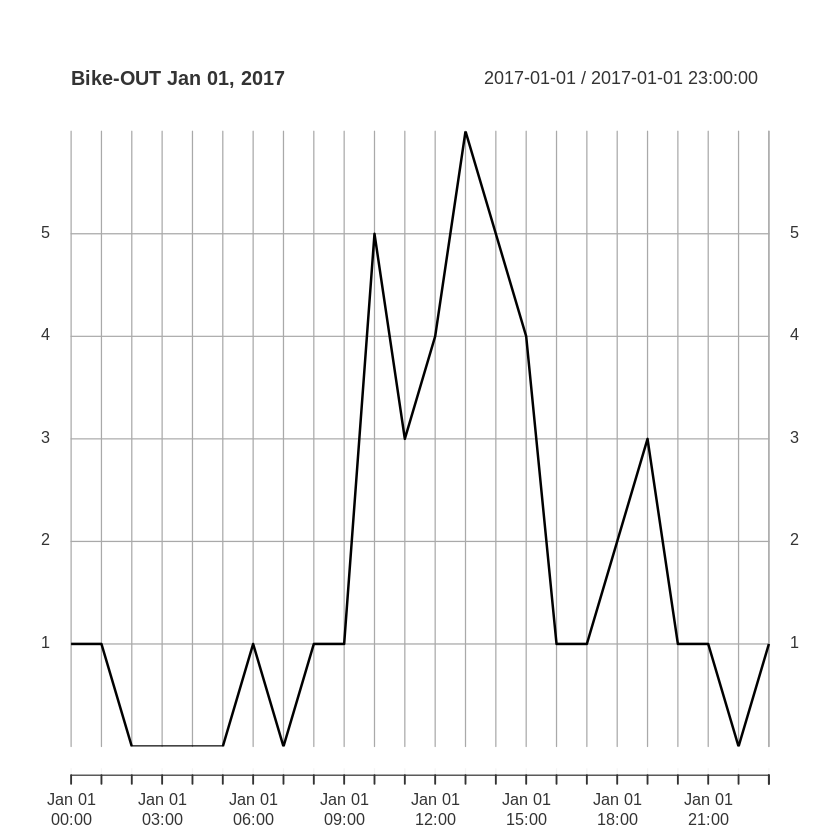

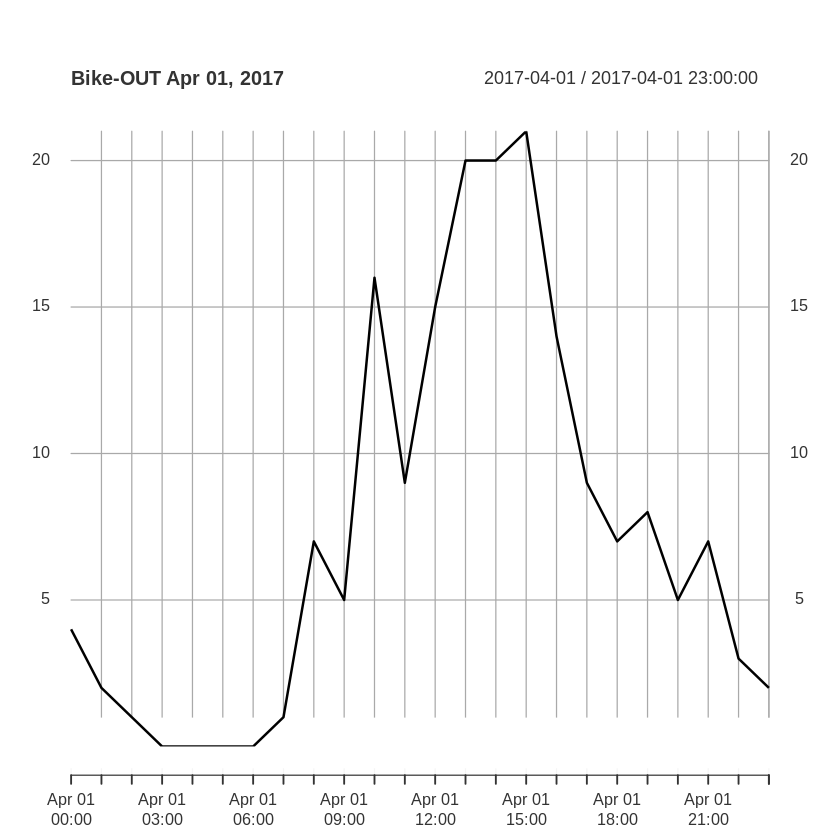

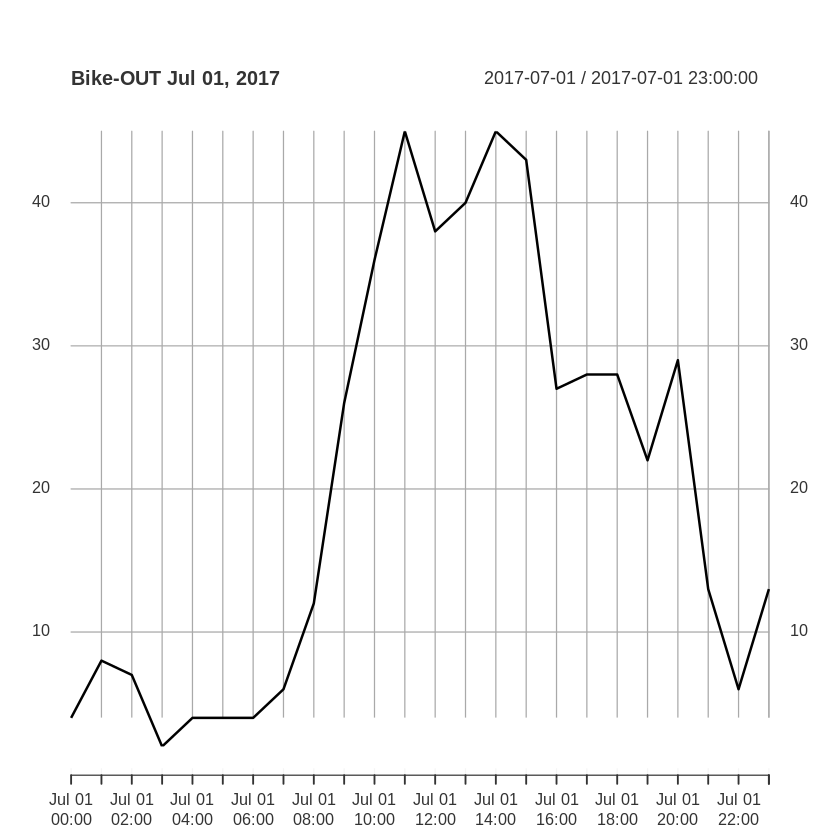

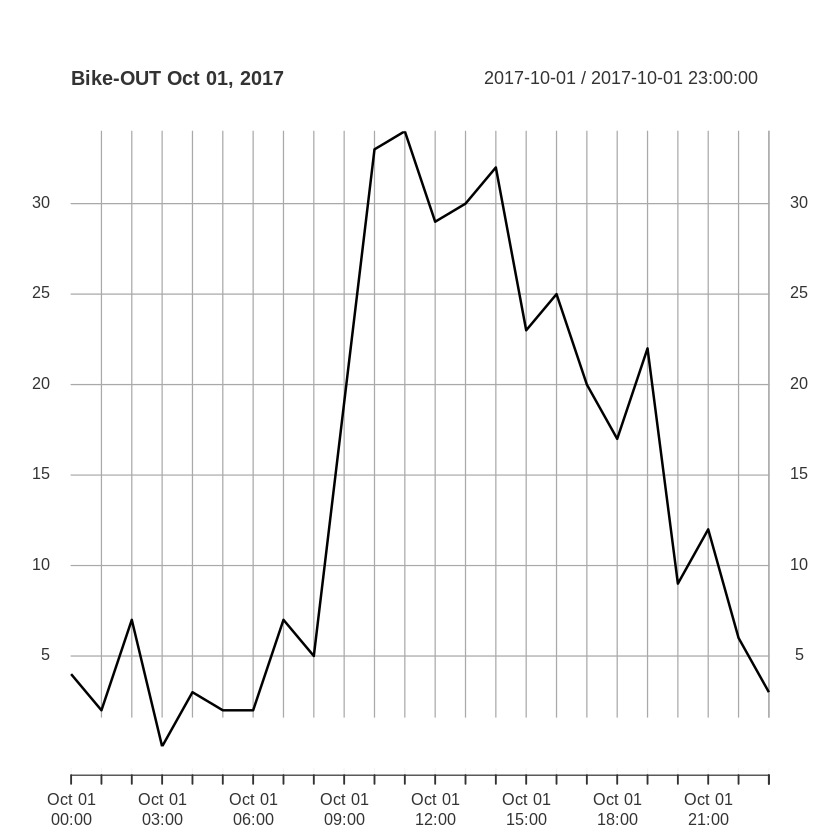

In [19]:
plot(nbh86_hr_out_1719_xts['/2017-01-01 23:00:00'],main = 'Bike-OUT Jan 01, 2017')
plot(nbh86_hr_out_1719_xts['2017-04-01 00:00:00/2017-04-01 23:00:00'], main = 'Bike-OUT Apr 01, 2017')
plot(nbh86_hr_out_1719_xts['2017-07-01 00:00:00/2017-07-01 23:00:00'], main = 'Bike-OUT Jul 01, 2017')
plot(nbh86_hr_out_1719_xts['2017-10-01 00:00:00/2017-10-01 23:00:00'], main = 'Bike-OUT Oct 01, 2017')

In [20]:
install.packages("TSA")
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




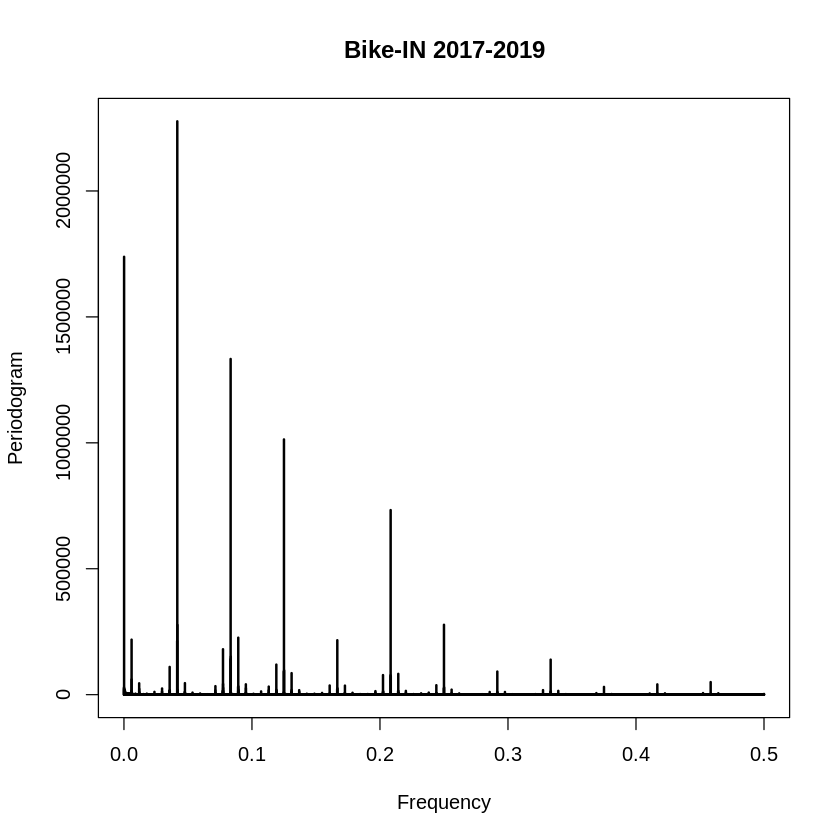

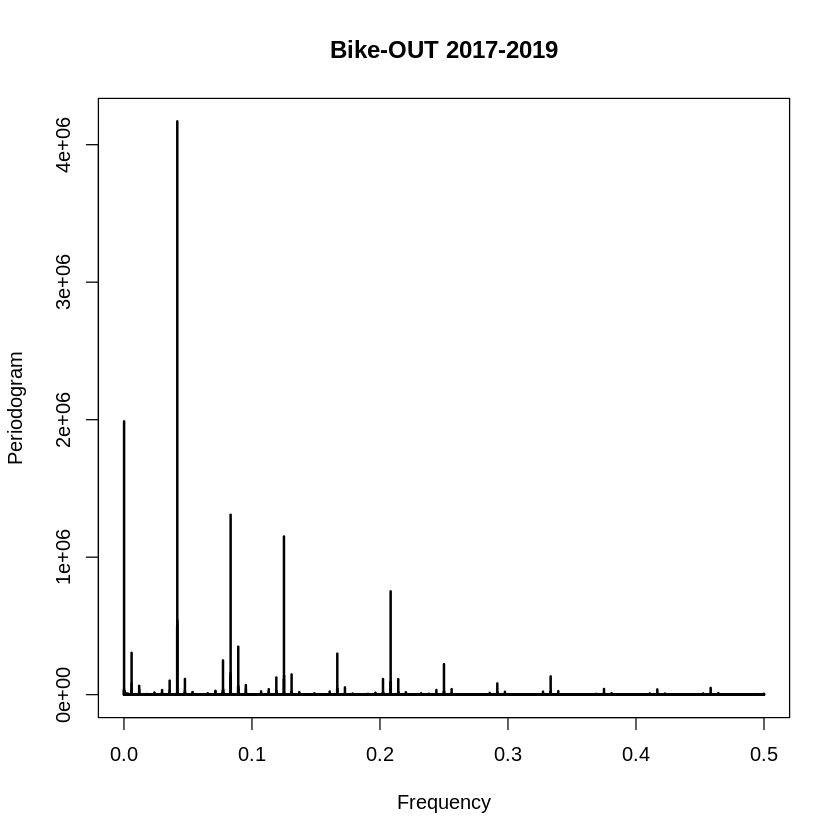

In [22]:
p_in <- periodogram(nbh86_hr_in_1719_xts, main='Bike-IN 2017-2019')
p_out <- periodogram(nbh86_hr_out_1719_xts, main='Bike-OUT 2017-2019')

In [24]:
# display the 3 highest "power" frequencies
p_in_df = data.frame(freq=p_in$freq, spec=p_in$spec)
order_p_in = p_in_df[order(-p_in_df$spec),]
top5_p_in = head(order_p_in, 5)
top5_p_in$period <- 1/top5_p_in$freq 
top5_p_in

# display the 3 highest "power" frequencies
p_out_df = data.frame(freq=p_out$freq, spec=p_out$spec)
order_p_out = p_out_df[order(-p_out_df$spec),]
top5_p_out = head(order_p_out, 5)
top5_p_out$period <- 1/top5_p_out$freq 
top5_p_out

freq         spec      period
1125 0.0416666667 2276416.3   24.0
3    0.0001111111 1738535.1 9000.0
2250 0.0833333333 1332835.1   12.0
3375 0.1250000000 1013362.1    8.0
5625 0.2083333333  732781.8    4.8

freq         spec      period
1125 0.0416666667 4169904.7   24.0
3    0.0001111111 1987636.2 9000.0
2250 0.0833333333 1308505.8   12.0
3375 0.1250000000 1150784.4    8.0
5625 0.2083333333  751739.1    4.8

**AUTOCORRELATIONS**

Bike-IN, Bike-OUT
* ACF
* PACF

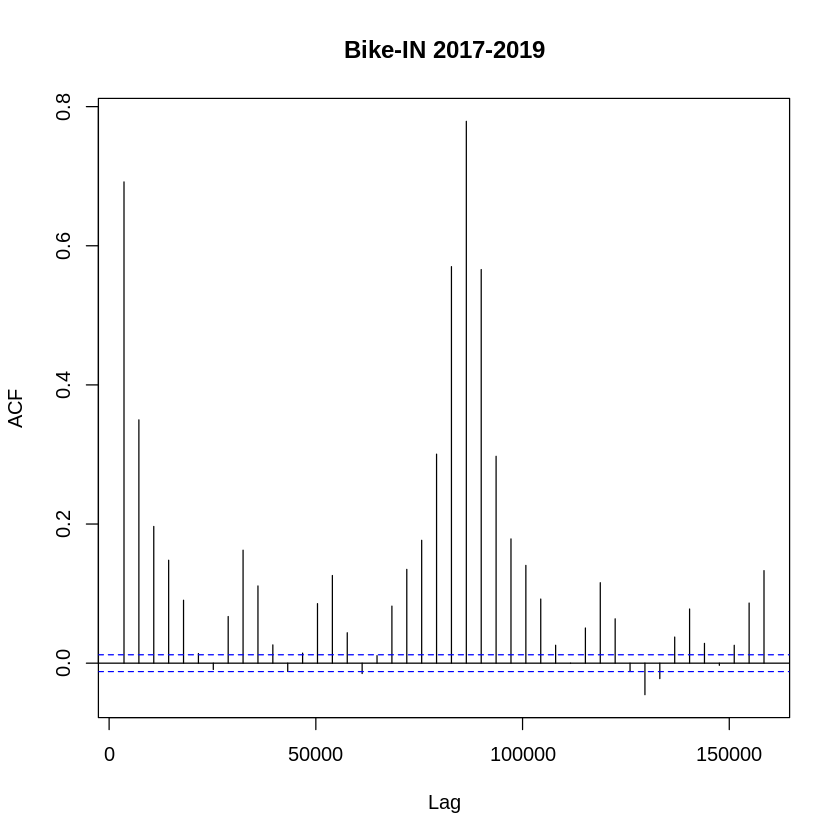

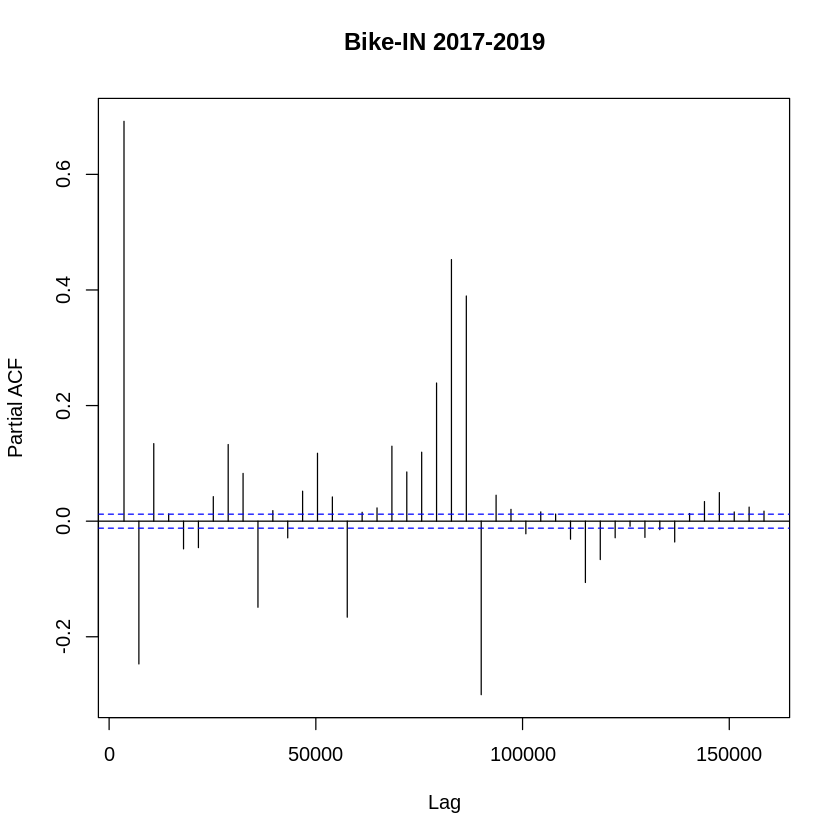

In [25]:
acf(nbh86_hr_in_1719_xts, main='Bike-IN 2017-2019')
pacf(nbh86_hr_in_1719_xts, main='Bike-IN 2017-2019')

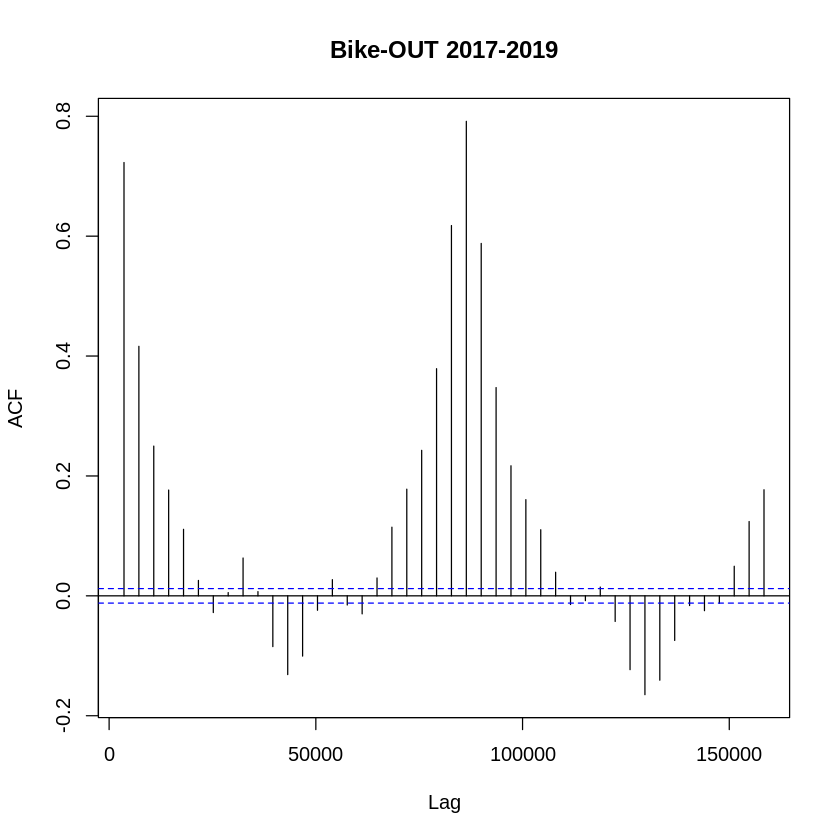

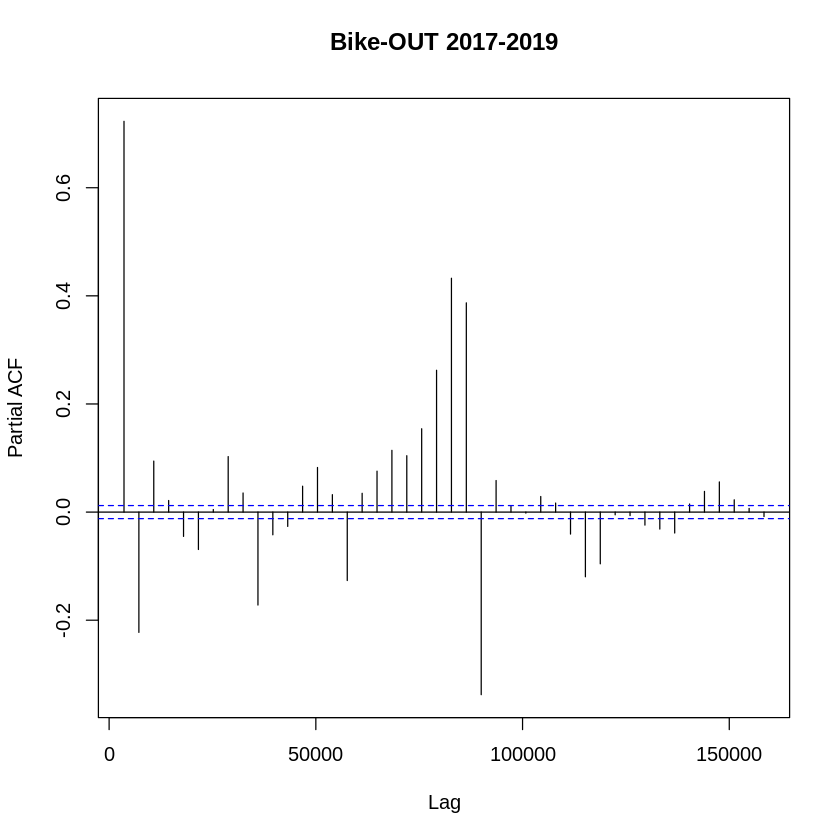

In [26]:
acf(nbh86_hr_out_1719_xts, main='Bike-OUT 2017-2019')
pacf(nbh86_hr_out_1719_xts, main='Bike-OUT 2017-2019')

In [27]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



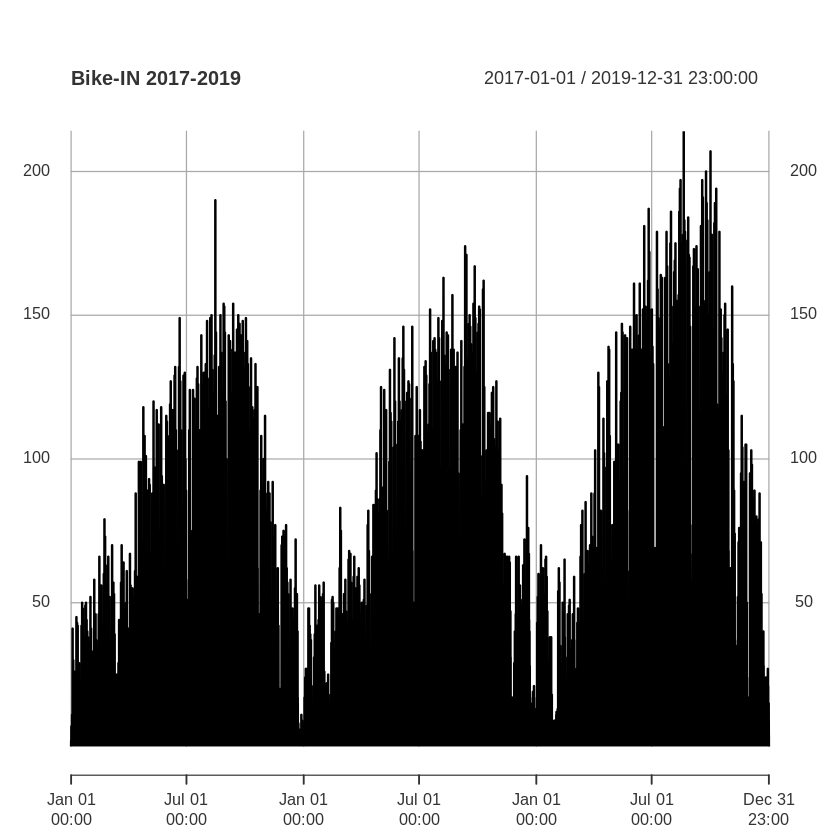

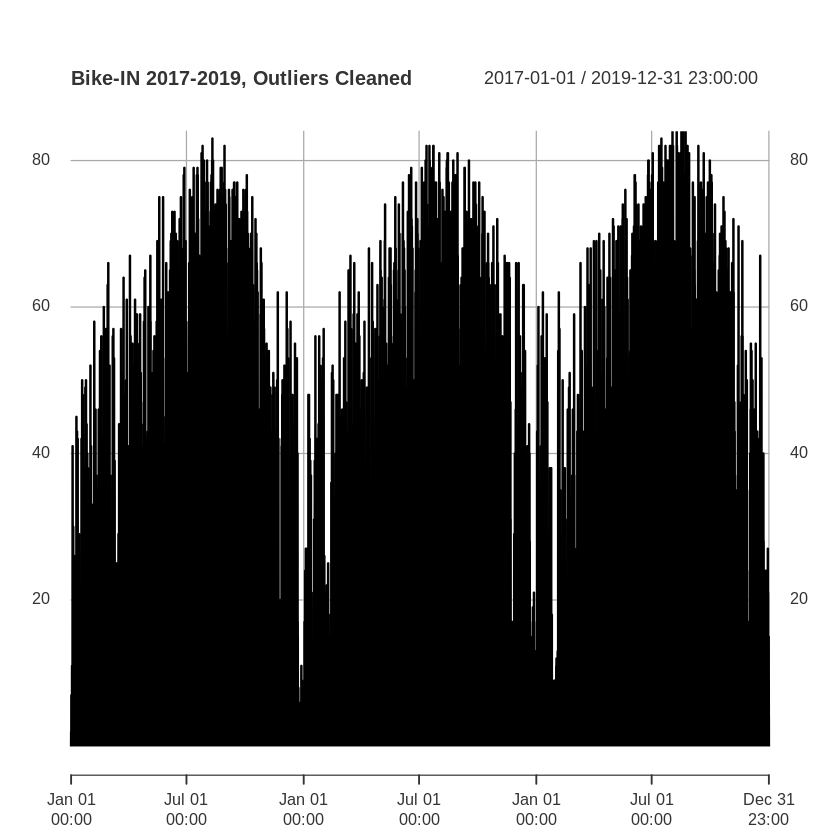

In [28]:
nbh86_hr_in_1719_xts_clean <- tsclean(nbh86_hr_in_1719_xts)
plot(nbh86_hr_in_1719_xts, main='Bike-IN 2017-2019')
plot(nbh86_hr_in_1719_xts_clean, main='Bike-IN 2017-2019, Outliers Cleaned')

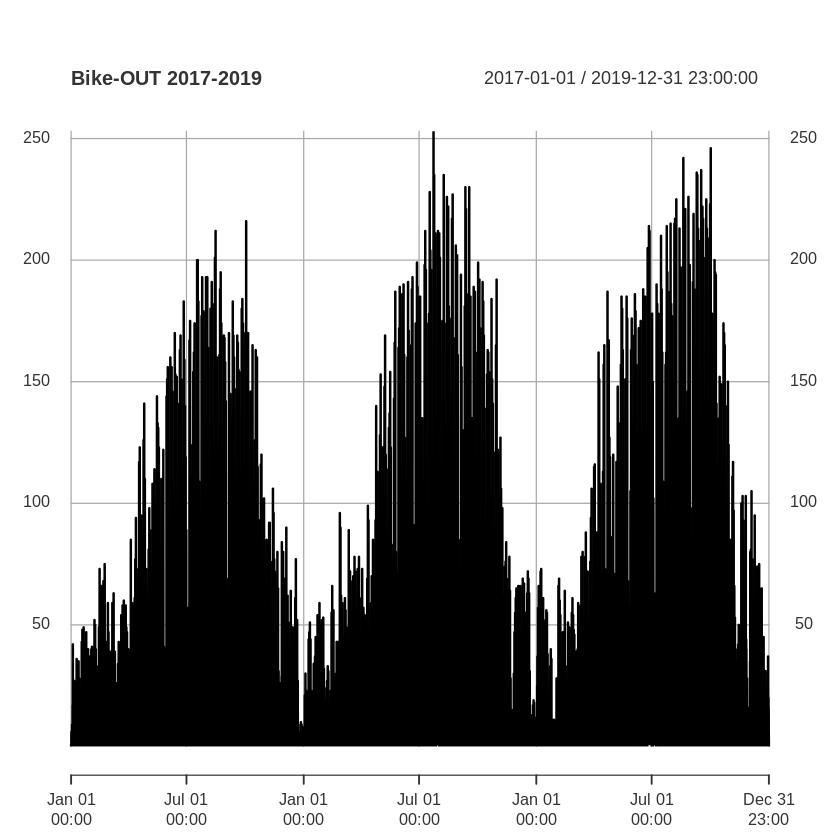

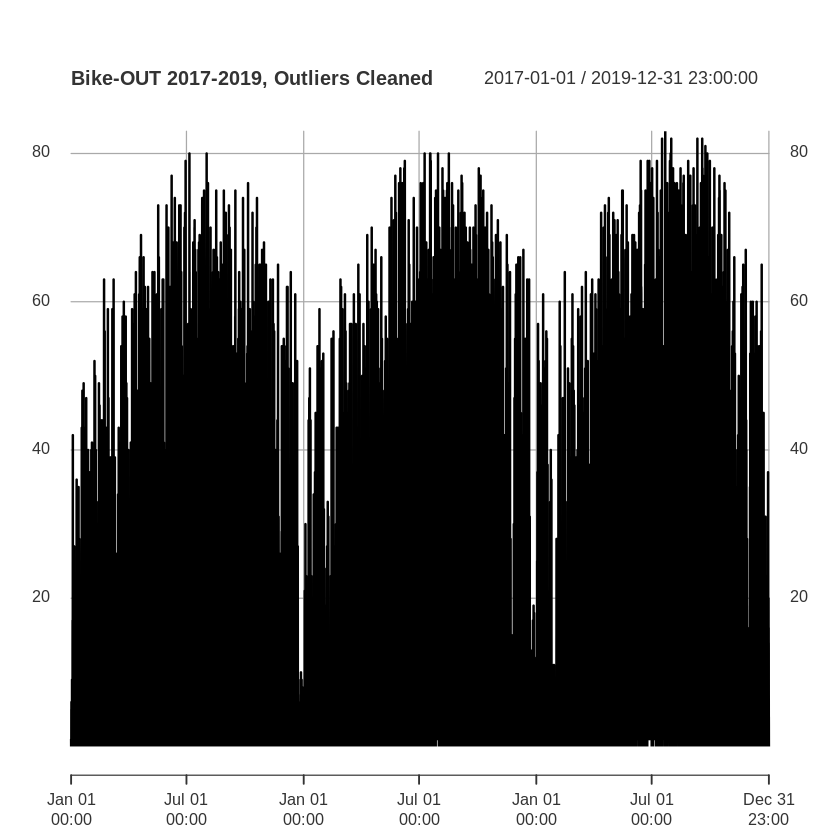

In [29]:
nbh86_hr_out_1719_xts_clean <- tsclean(nbh86_hr_out_1719_xts)
plot(nbh86_hr_out_1719_xts, main='Bike-OUT 2017-2019')
plot(nbh86_hr_out_1719_xts_clean, main='Bike-OUT 2017-2019, Outliers Cleaned')

In [30]:
install.packages('tseries')
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
# ADF Test
adf.test(nbh86_hr_in_1719_xts_clean)
adf.test(nbh86_hr_out_1719_xts_clean)

Warning message in adf.test(nbh86_hr_in_1719_xts_clean):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  nbh86_hr_in_1719_xts_clean
Dickey-Fuller = -8.8653, Lag order = 29, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(nbh86_hr_out_1719_xts_clean):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  nbh86_hr_out_1719_xts_clean
Dickey-Fuller = -9.1418, Lag order = 29, p-value = 0.01
alternative hypothesis: stationary


In [32]:
# KPSS Test
kpss.test(nbh86_hr_in_1719_xts_clean)
kpss.test(nbh86_hr_out_1719_xts_clean)

Warning message in kpss.test(nbh86_hr_in_1719_xts_clean):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  nbh86_hr_in_1719_xts_clean
KPSS Level = 5.2849, Truncation lag parameter = 16, p-value = 0.01


Warning message in kpss.test(nbh86_hr_out_1719_xts_clean):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  nbh86_hr_out_1719_xts_clean
KPSS Level = 6.2492, Truncation lag parameter = 16, p-value = 0.01


**MODELING**


* train_1718 vs test_19

In [33]:
nbh_hr_in_1721 <- data.frame(Nbh_Hour_IN_1721_full[,c('Hour','X8.6')])
nbh86_hr_in_1721 <- data.frame(nbh_hr_in_1721[,c('Hour','X8.6')])
nbh86_hr_in_1721$Hour <- strptime(nbh86_hr_in_1721$Hour, format = '%Y-%m-%d %H:%M:%S')
nbh86_hr_in_1721_xts <- as.xts(nbh86_hr_in_1721$`X8.6`, order.by = nbh86_hr_in_1721$Hour)

nbh_hr_out_1721 <- data.frame(Nbh_Hour_OUT_1721_full[,c('Hour','X8.6')])
nbh86_hr_out_1721 <- data.frame(nbh_hr_out_1721[,c('Hour','X8.6')])
nbh86_hr_out_1721$Hour <- strptime(nbh86_hr_out_1721$Hour, format = '%Y-%m-%d %H:%M:%S')
nbh86_hr_out_1721_xts <- as.xts(nbh86_hr_out_1721$`X8.6`, order.by = nbh86_hr_out_1721$Hour)

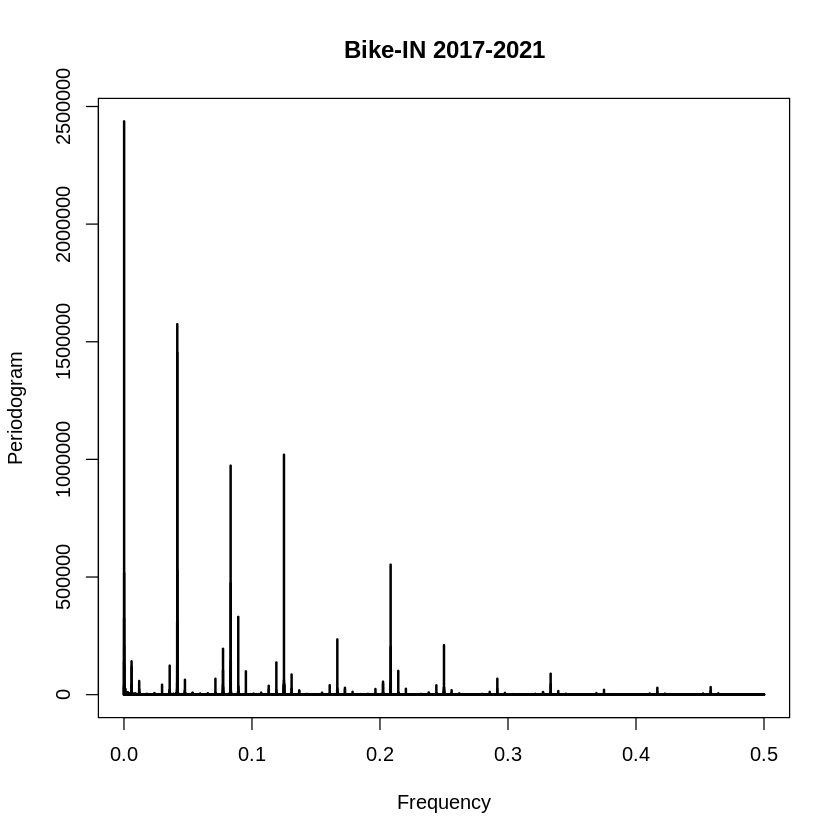

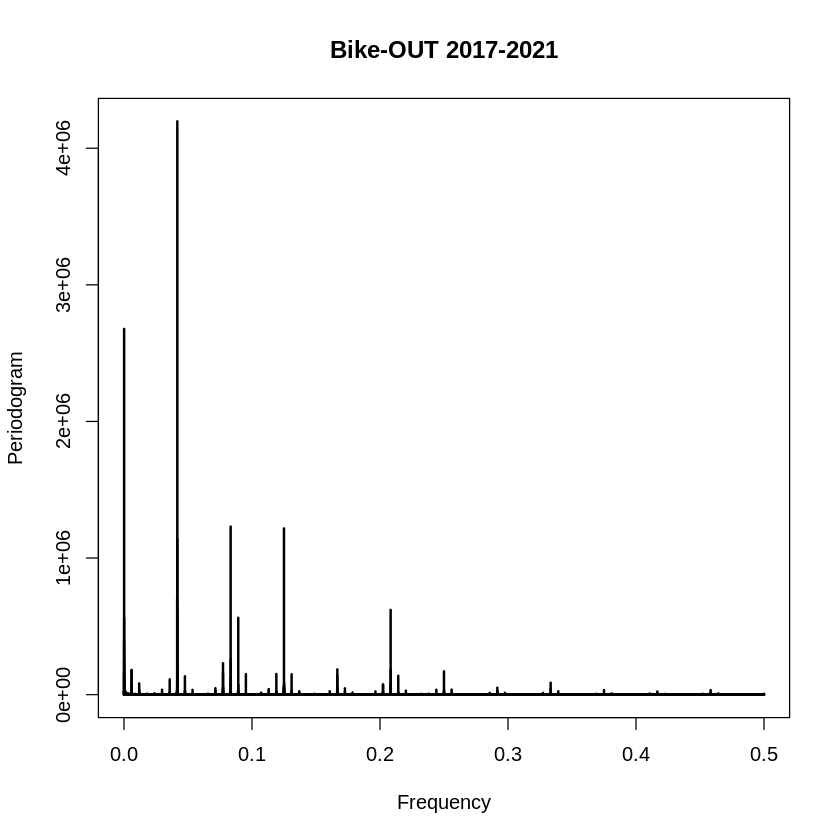

In [34]:
periodogram(as.xts(nbh86_hr_in_1721$`X8.6`, order.by = nbh86_hr_in_1721$Hour), main='Bike-IN 2017-2021')
periodogram(as.xts(nbh86_hr_out_1721$`X8.6`, order.by = nbh86_hr_out_1721$Hour), main='Bike-OUT 2017-2021')

In [38]:
train_1718 <- nbh86_hr_in_1719_xts_clean['/2018-12']
test_19 <- nbh86_hr_in_1719_xts['2019-01/2019-12']

## Modeling & Forecasting 1: TBATS (All Seasonalities Included)

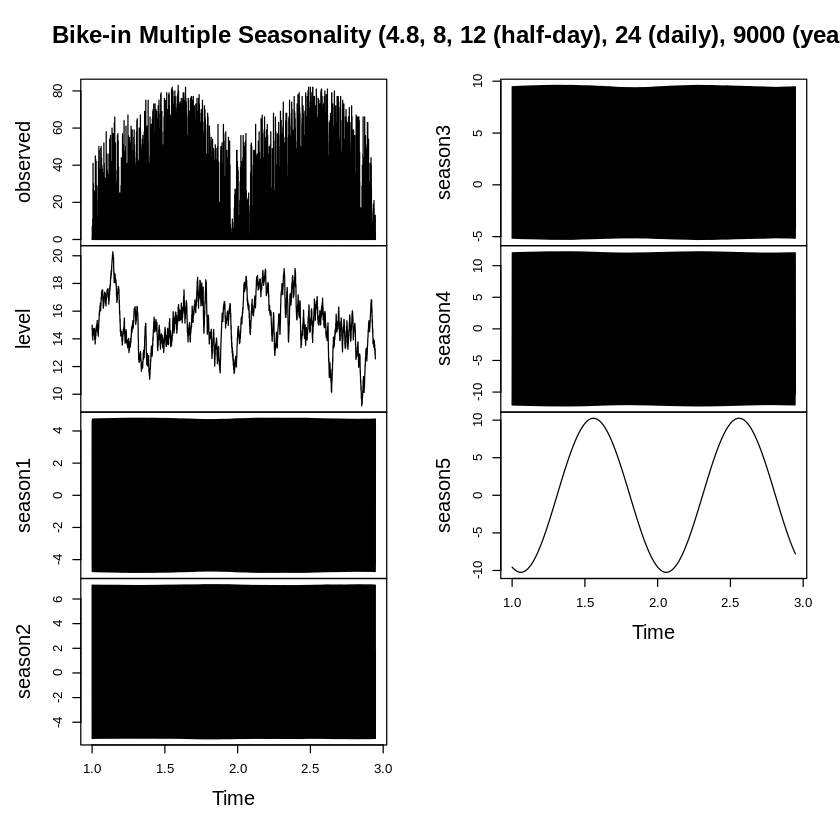

In [39]:
msts_in_train <- msts(train_1718, seasonal.periods=c(4.8, 8, 12, 24, 9000))
tbats_in_train <- tbats(msts_in_train)
plot(tbats.components(tbats_in_train),main='Bike-in Multiple Seasonality (4.8, 8, 12 (half-day), 24 (daily), 9000 (yearly))')

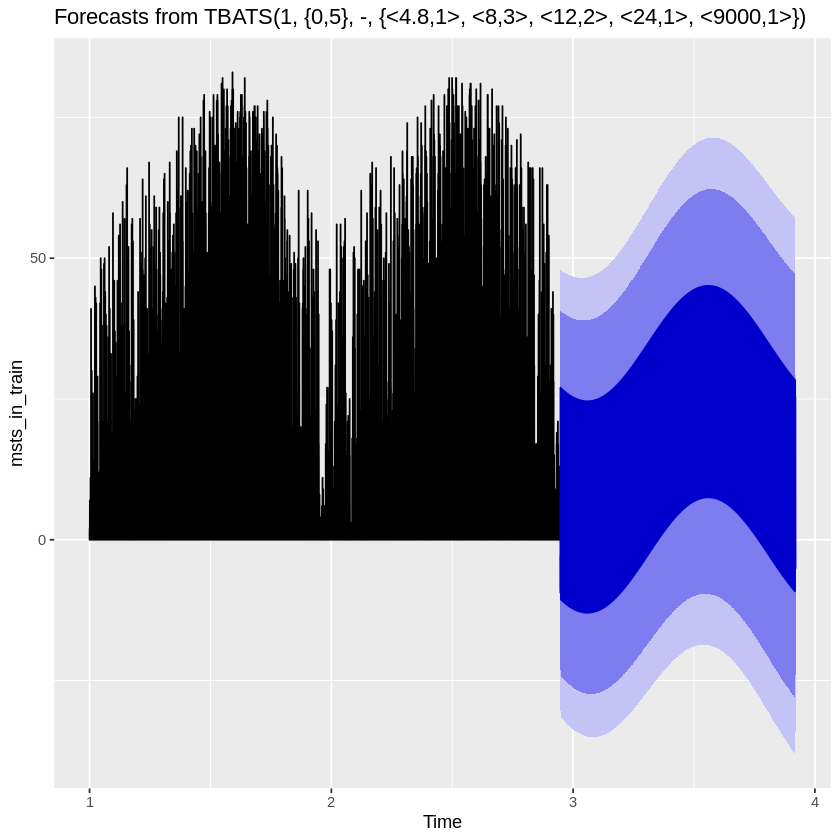

In [40]:
tbats_in_train_fc19 <- forecast(tbats_in_train,h=8760)
autoplot(tbats_in_train_fc19)

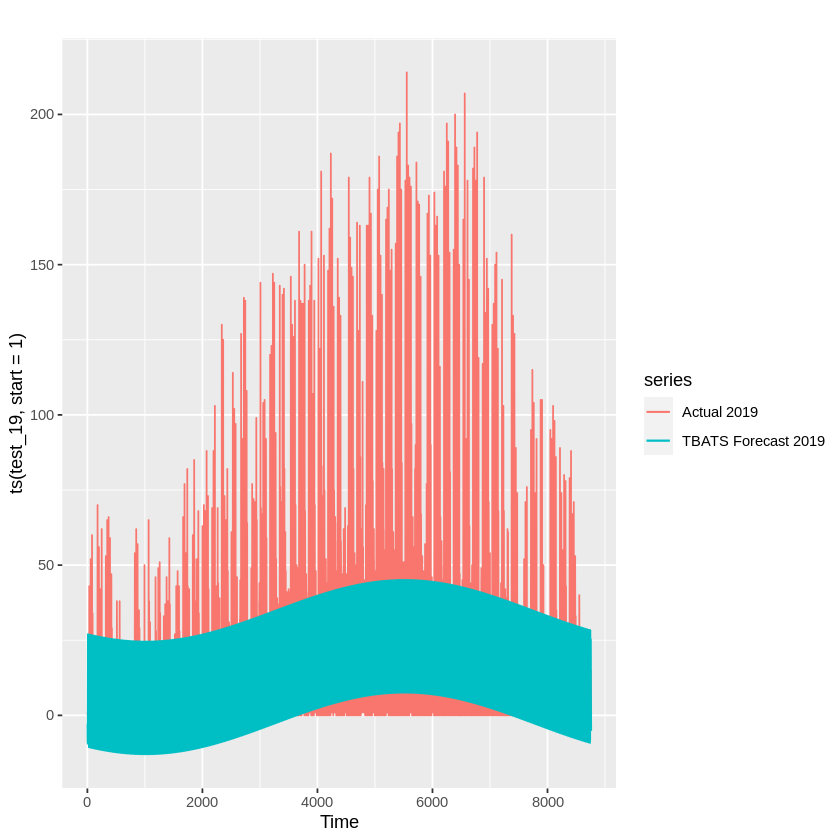

In [41]:
autoplot(ts(test_19,start = 1), series='Actual 2019') + autolayer(ts(tbats_in_train_fc19$mean, start = 1), series='TBATS Forecast 2019')


	Ljung-Box test

data:  Residuals from TBATS
Q* = 145371, df = 3466, p-value < 2.2e-16

Model df: 38.   Total lags used: 3504



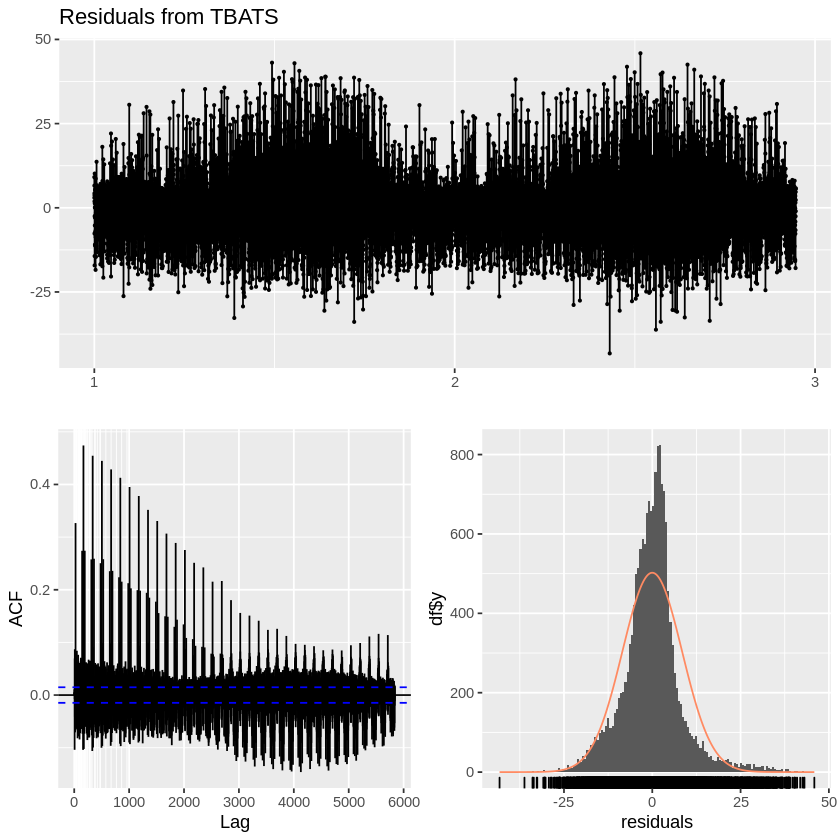

In [54]:
checkresiduals(tbats_in_train)

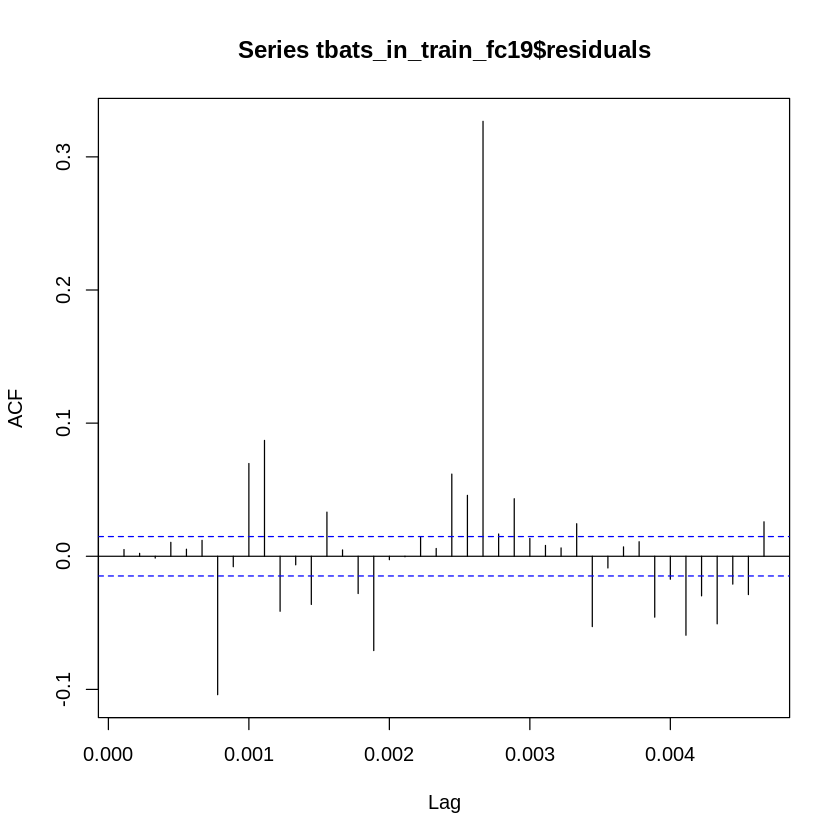

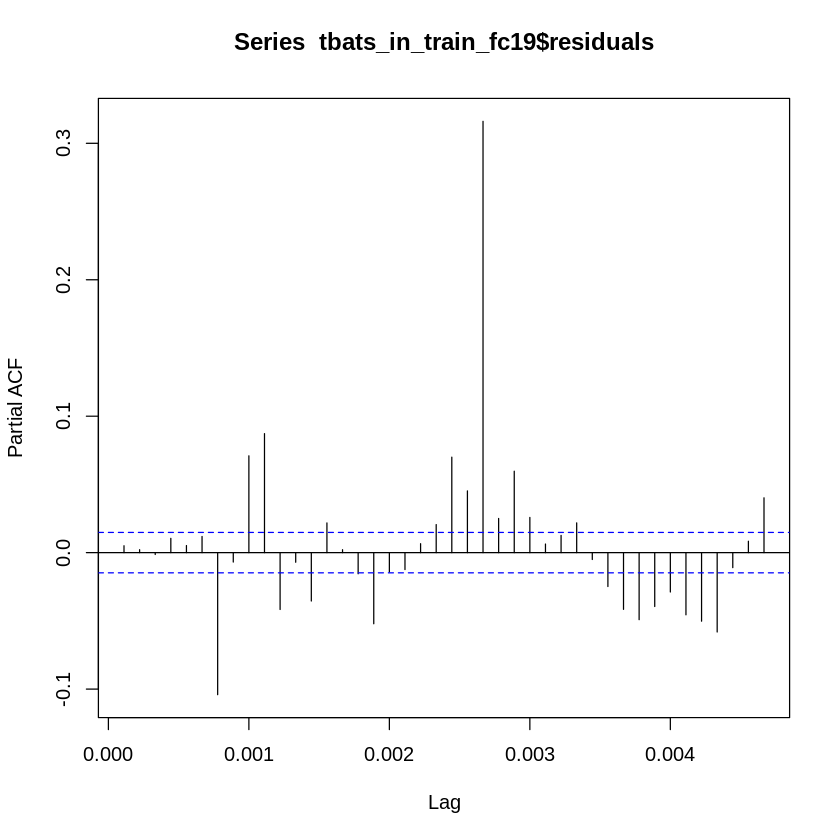

In [44]:
acf(tbats_in_train_fc19$residuals)
pacf(tbats_in_train_fc19$residuals)

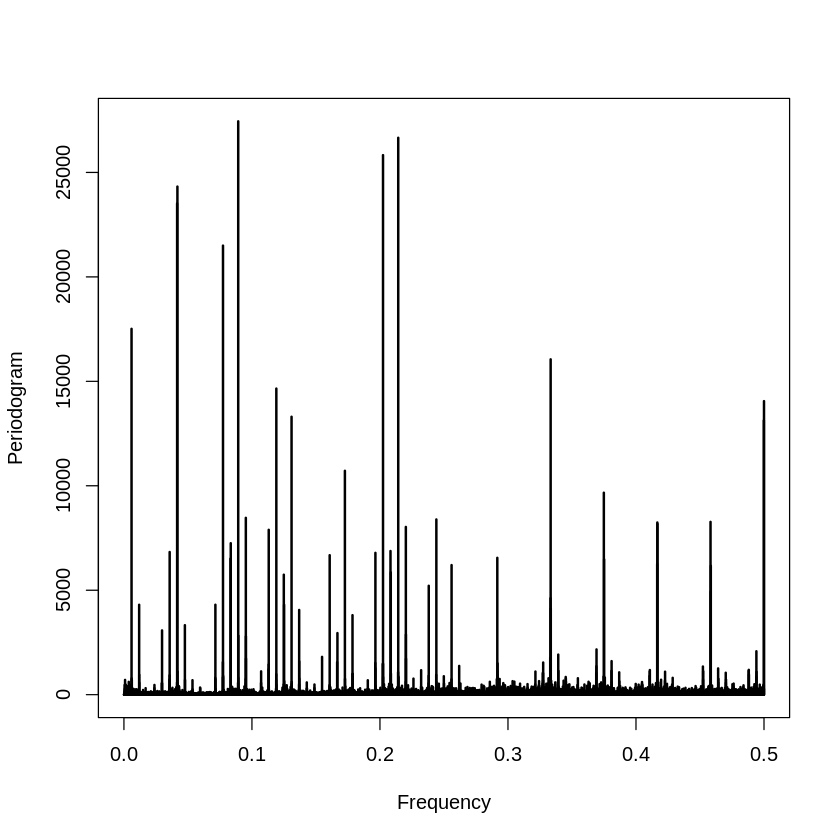

In [43]:
periodogram(tbats_in_train_fc19$residuals)

In [47]:
print('Accuracy - TBATS for Erratic TS:')
accuracy(ts(test_19),ts(tbats_in_train_fc19$mean))

[1] "Accuracy - TBATS for Erratic TS:"


ME        RMSE    MAE      MPE       MAPE     ACF1      Theil's U
Test set -5.946371 19.5476 11.20186 -26.44434 172.6922 0.5347444 0.6507094

In [48]:
# Define SMAPE
smape <- function(act, fc){
  pred <- as.vector(fc)
  sm <- abs(act - pred) / (abs(act) + abs(pred) + 1e-12)
  200 * mean(sm, na.rm=T)
}

In [49]:
print('sMAPE - TBATS for Erratic TS:')
smape(ts(test_19),ts(tbats_in_train_fc19$mean))

[1] "sMAPE - TBATS for Erratic TS:"


[1] 92.47301

## Modeling & Forecasting 2: AUTO ARIMA

In [64]:
aarima_in_train <- auto.arima(ts(train_1718,frequency = 24*365), seasonal=FALSE, xreg = fourier(ts(train_1718,frequency = 24*365), K=5))

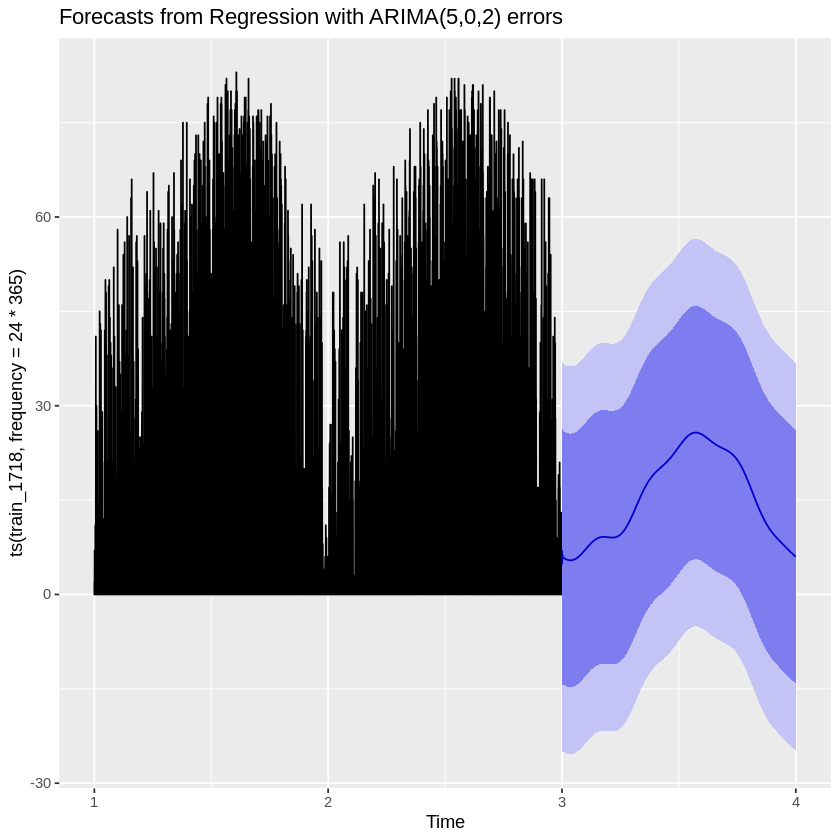

In [65]:
aarima_in_train_fc19 <- forecast(aarima_in_train, h=24*365, xreg = fourier(ts(train_1718,frequency=24*365), K=5, h=24*365))
autoplot(aarima_in_train_fc19)

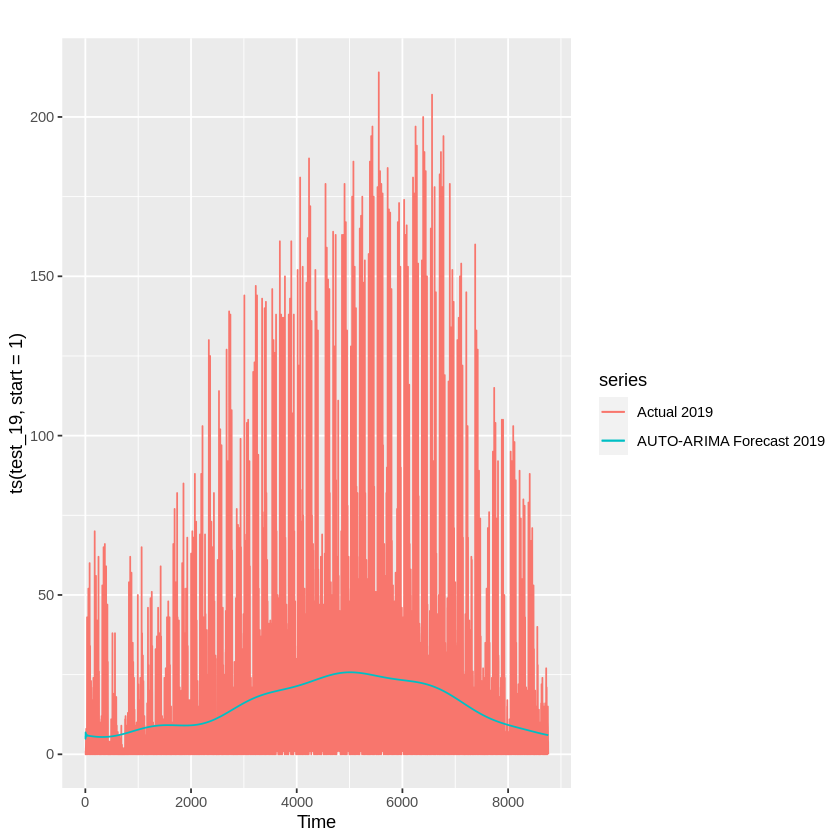

In [66]:
autoplot(ts(test_19,start = 1), series='Actual 2019') + autolayer(ts(aarima_in_train_fc19$mean, start = 1), series='AUTO-ARIMA Forecast 2019')


	Ljung-Box test

data:  Residuals from Regression with ARIMA(5,0,2) errors
Q* = 631136, df = 3486, p-value < 2.2e-16

Model df: 18.   Total lags used: 3504



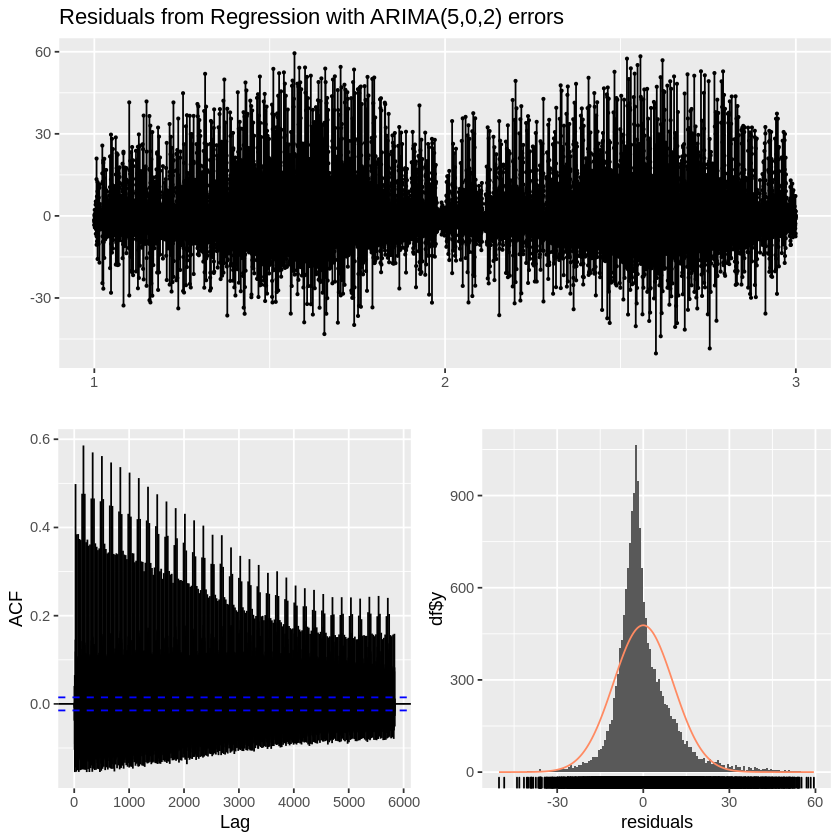

In [67]:
checkresiduals(aarima_in_train)

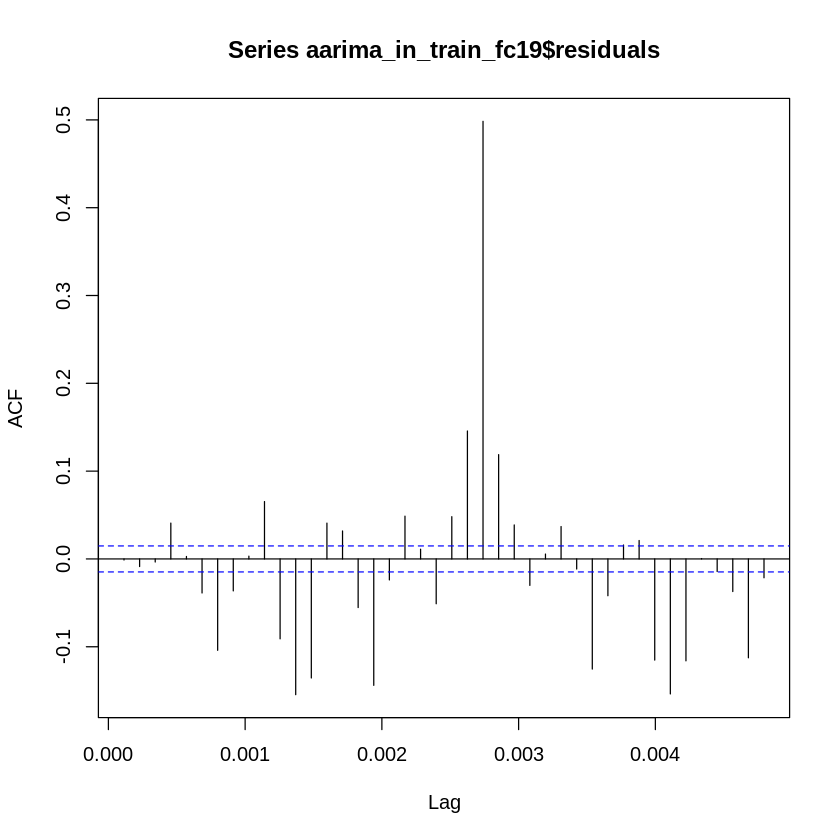

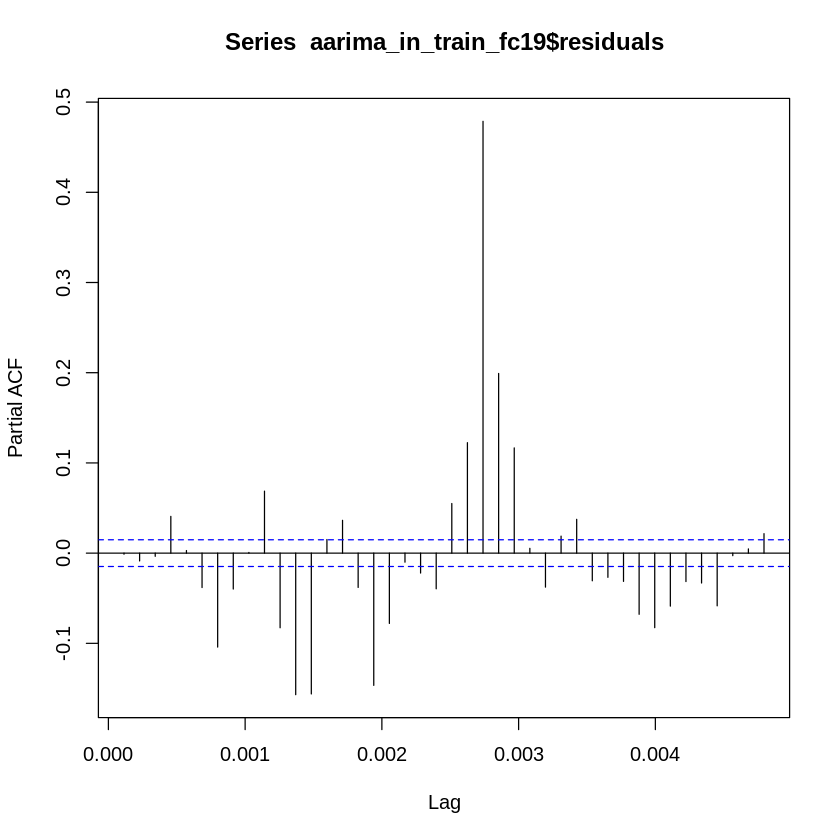

In [68]:
acf(aarima_in_train_fc19$residuals)
pacf(aarima_in_train_fc19$residuals)

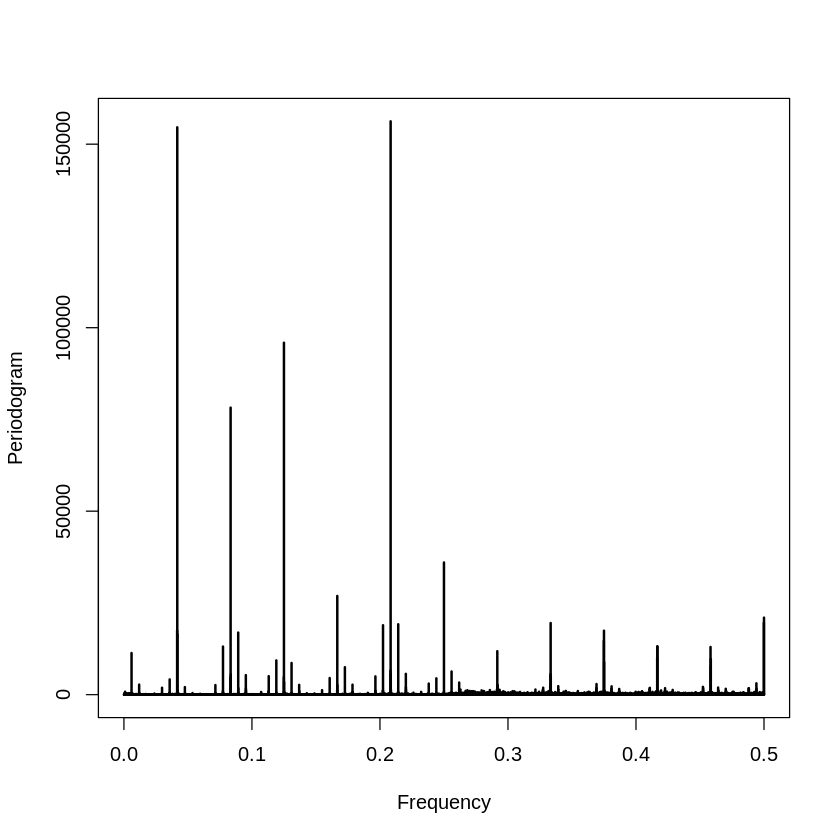

In [69]:
periodogram(aarima_in_train_fc19$residuals)

In [98]:
print('Accuracy - Auto-Arima for Erratic TS:')
accuracy(ts(test_19),ts(aarima_in_train_fc19$mean))

[1] "Accuracy - Auto-Arima for Erratic TS:"


ME        RMSE     MAE      MPE       MAPE     ACF1      Theil's U
Test set -3.506706 24.32633 14.63797 -21.16199 97.86875 0.6264557 294.3934

In [99]:
print('sMAPE - Auto-Arima for Erratic TS:')
smape(ts(test_19),ts(aarima_in_train_fc19$mean))

[1] "sMAPE - Auto-Arima for Erratic TS:"


[1] 94.58012

## Modeling & Forecasting 3: CROSTON

In [ ]:
#library(devtools)
#install_local('/content/tsintermittent_1.9.tar.gz')
#library(tsintermittent)

In [82]:
croston_in_train <- croston(ts(train_1718,frequency = 24*365),h=24*365)

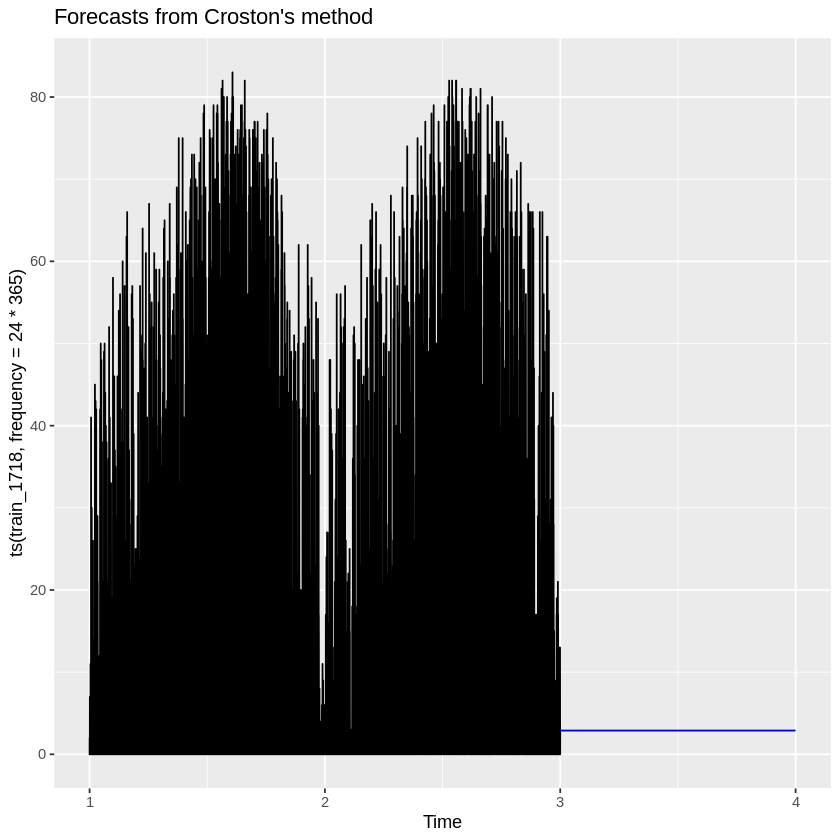

In [83]:
autoplot(croston_in_train)

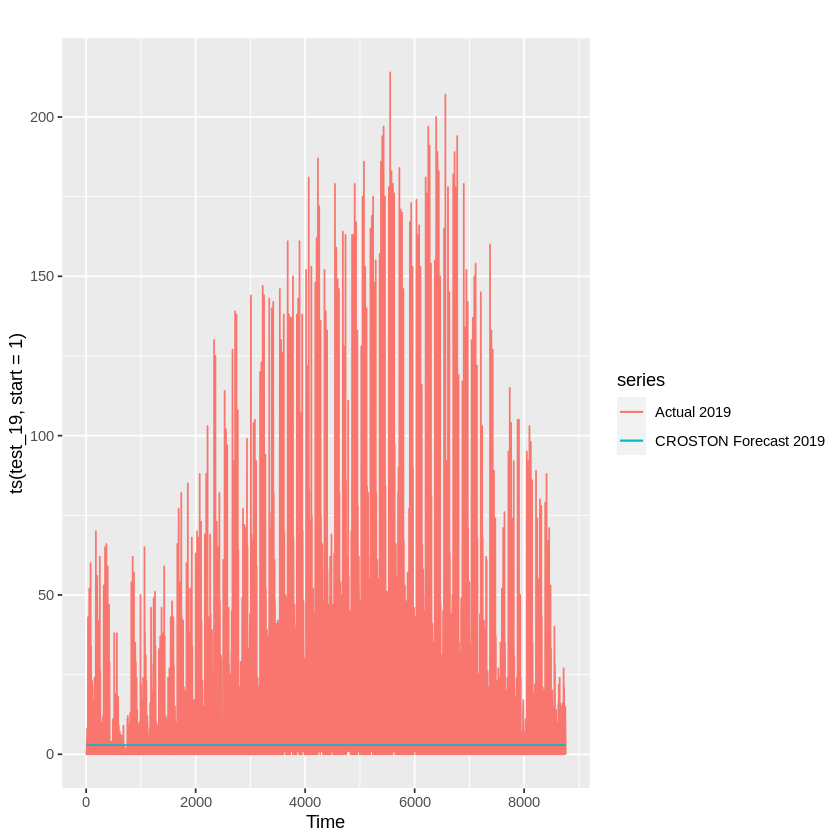

In [84]:
autoplot(ts(test_19,start = 1), series='Actual 2019') + autolayer(ts(croston_in_train$mean, start = 1), series='CROSTON Forecast 2019')

Warning message in modeldf.default(object):
“Could not find appropriate degrees of freedom for this model.”


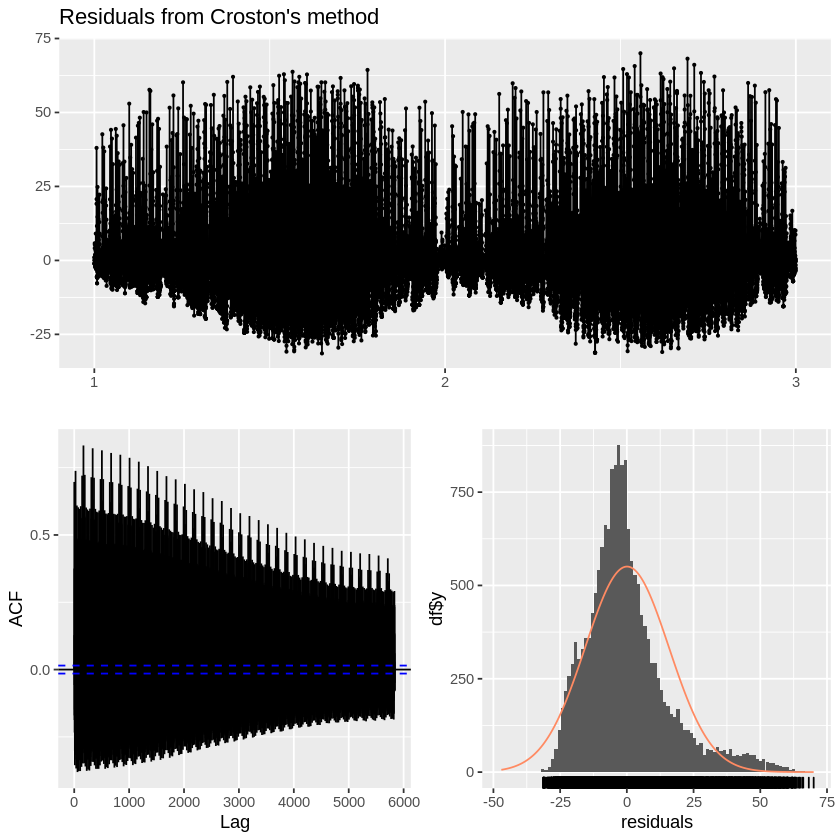

In [85]:
checkresiduals(croston_in_train)

In [90]:
croston_residuals <- croston_in_train$residuals

x            
    [1,]            NA
    [2,] -1.000000e+00
    [3,]  1.000000e+00
    [4,]  1.000000e+00
    [5,] -1.091743e+00
    [6,] -1.091743e+00
    [7,] -1.091743e+00
    [8,] -9.174312e-02
    [9,]  1.520637e-01
   [10,]  1.407402e-01
   [11,]  4.129985e+00
   [12,]  5.806762e+00
   [13,]  5.342211e+00
   [14,] -9.389600e-02
   [15,] -1.086087e+00
   [16,]  5.780146e-03
   [17,]  1.005284e+00
   [18,]  1.917685e+00
   [19,] -2.515949e-01
   [20,]  7.708777e-01
   [21,] -2.298721e+00
   [22,] -2.987209e-01
   [23,] -2.081697e+00
   [24,] -1.081697e+00
   [25,] -8.340072e-01
   [26,] -1.767257e+00
   [27,] -1.767257e+00
   [28,] -1.767257e+00
   [29,] -1.767257e+00
   [30,] -1.767257e+00
   [31,] -7.672570e-01
   [32,] -1.210369e+00
   [33,]  4.789631e+00
   [34,]  1.585341e+00
   [35,]  3.490798e+00
   [36,]  3.273865e+00
   [37,]  9.062409e+00
   [38,]  1.455586e+00
   [39,]  3.547894e-01
   [40,]  1.329441e+00
   [41,]  4.231667e+00
   [42,] -8.800982e-02
   [43,] -8.119453e-02
   [44,] -2.074762e+00
   [45,]  9.309894e-02
   [46,] -2.914580e+00
   [47,] -2.914580e+00
   [48,] -1.914580e+00
   [49,] -2.357941e+00
   [50,] -2.357941e+00
   [51,] -1.357941e+00
   [52,] -1.966598e+00
   [53,] -1.966598e+00
   [54,] -1.966598e+00
   [55,]  4.033402e+00
   [56,]  1.913727e+01
   [57,]  3.802280e+01
   [58,]  2.071200e+01
   [59,] -5.981416e-01
   [60,] -5.558863e+00
   [61,] -1.180844e+00
   [62,]  9.021109e-01
   [63,] -1.163206e+00
   [64,] -7.659447e-02
   [65,]  3.929258e+00
   [66,]  1.162177e+01
   [67,]  2.692067e+00
   [68,]  2.472316e+00
   [69,] -7.733274e+00
   [70,] -7.733274e+00
   [71,] -5.733274e+00
   [72,] -5.199602e+00
   [73,] -5.812745e+00
   [74,] -5.812745e+00
   [75,] -5.812745e+00
   [76,] -5.812745e+00
   [77,] -5.812745e+00
   [78,] -3.812745e+00
   [79,]  5.003980e+00
   [80,]  1.471451e+01
   [81,]  2.482586e+01
   [82,]  1.264720e+00
   [83,] -3.817876e+00
   [84,] -3.559578e+00
   [85,] -3.107064e-01
   [86,] -1.288309e+00
   [87,] -5.192775e+00
   [88,] -2.797489e+00
   [89,] -5.793293e-01
   [90,]  2.466866e+00
   [91,]  1.266091e+00
   [92,] -8.389086e-01
   [93,] -3.768128e+00
   [94,] -4.445155e+00
   [95,] -5.058630e+00
   [96,] -5.058630e+00
   [97,] -5.058630e+00
   [98,] -5.058630e+00
   [99,] -5.058630e+00
  [100,] -5.058630e+00
  [101,] -5.058630e+00
  [102,] -3.058630e+00
  [103,]  1.037744e+00
  [104,]  1.397850e+01
  [105,]  2.214464e+01
  [106,]  5.768117e+00
  [107,] -4.604534e+00
  [108,] -2.296141e+00
  [109,] -1.371031e-01
  [110,]  8.726942e-01
  [111,]  8.084996e-01
  [112,] -2.252588e+00
  [113,]  6.921875e+00
  [114,]  8.373408e+00
  [115,]  3.695858e+00
  [116,] -3.609017e+00
  [117,] -4.306000e+00
  [118,] -4.938570e+00
  [119,] -4.510889e+00
  [120,] -5.114940e+00
  [121,] -5.114940e+00
  [122,] -5.114940e+00
  [123,] -5.114940e+00
  [124,] -5.114940e+00
  [125,] -5.114940e+00
  [126,] -5.114940e+00
  [127,] -2.114940e+00
  [128,]  1.296246e+01
  [129,]  2.221869e+01
  [130,] -1.129504e-01
  [131,] -1.105898e+00
  [132,] -3.034157e+00
  [133,] -1.830159e+00
  [134,]  1.297057e+00
  [135,] -2.795938e+00
  [136,] -5.896382e-01
  [137,]  5.455040e+00
  [138,]  9.031438e+00
  [139,]  1.314087e+00
  [140,] -4.792481e+00
  [141,] -3.396339e+00
  [142,] -2.110646e+00
  [143,] -4.930238e+00
  [144,] -3.930238e+00
  [145,] -4.223061e+00
  [146,] -4.223061e+00
  [147,] -4.223061e+00
  [148,] -4.223061e+00
  [149,] -4.223061e+00
  [150,] -4.223061e+00
  [151,] -4.223061e+00
  [152,] -3.223061e+00
  [153,]  4.776947e-01
  [154,]  4.516605e-01
  [155,]  4.258718e-01
  [156,]  3.400466e+00
  [157,] -8.109238e-01
  [158,]  2.414695e-01
  [159,] -7.747041e-01
  [160,]  2.789573e-01
  [161,] -1.740978e+00
  [162,]  1.387093e+00
  [163,]  2.822839e-01
  [164,] -1.739580e+00
  [165,] -6.017361e-01
  [166,] -1.553044e+00
  [167,] -2.424928e+00
  [168,] -2.424928e+00
  [169,] -1.424928e+00
  [170,] -1.973827e+00
  [171,] -1.973827e+00
  [172,] -1.973827e+00
  [173,] -1.973827e+00
  [174,

In [95]:
print('Accuracy - Croston for Erratic TS:')
accuracy(ts(test_19),ts(croston_in_train$mean))

[1] "Accuracy - Croston for Erratic TS:"


ME        RMSE    MAE     MPE       MAPE    ACF1      Theil's U
Test set -15.96384 30.1913 17.1728 -552.4177 594.253 0.6703222 Inf

In [97]:
print('sMAPE - Croston for Erratic TS:')
smape(ts(test_19),ts(croston_in_train$mean))

[1] "sMAPE - Croston for Erratic TS:"


[1] 129.3415

## Evaluation

In [ ]:
print('Accuracy - TBATS for Erratic TS:')
accuracy(ts(test_19),ts(tbats_in_train_fc19$mean))
print('Accuracy - Auto-Arima for Erratic TS:')
accuracy(ts(test_19)[1:8668],ts(aarima_in_train_fc19$mean))
print('Accuracy - Croston for Erratic TS:')
accuracy(ts(test_19)[1:8668],ts(croston_in_train$mean))

[1] "Accuracy - TBATS for Erratic TS:"


ME        RMSE    MAE      MPE      MAPE     ACF1      Theil's U
Test set -4.025201 18.2883 10.41729 19.89298 144.0003 0.4989342 1.561193

[1] "Accuracy - Auto-Arima for Erratic TS:"


ME        RMSE     MAE      MPE       MAPE     ACF1      Theil's U
Test set -3.543639 24.48303 14.77407 -21.80005 98.56472 0.6273888 397.6167

[1] "Accuracy - Croston for Erratic TS:"


ME        RMSE    MAE      MPE       MAPE     ACF1      Theil's U
Test set -16.09969 30.3437 17.30337 -557.1187 598.7714 0.6694046 Inf

In [100]:
print('sMAPE - TBATS for Erratic TS:')
smape(ts(test_19),ts(tbats_in_train_fc19$mean))
print('sMAPE - Auto-Arima for Erratic TS:')
smape(ts(test_19),ts(aarima_in_train_fc19$mean))
print('sMAPE - Croston for Erratic TS:')
smape(ts(test_19),ts(croston_in_train$mean))

[1] "sMAPE - TBATS for Erratic TS:"


[1] 92.47301

[1] "sMAPE - Auto-Arima for Erratic TS:"


[1] 94.58012

[1] "sMAPE - Croston for Erratic TS:"


[1] 129.3415